#### [Data set here :](https://drive.google.com/file/d/1f06L7CjatwaBgdgMFKVWCCUfHZXWezPG/view?usp=sharing)

About Dataset

1 Company- String -Laptop Manufacturer

2 Product -String -Brand and Model

3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)

4 Inches -Numeric- Screen Size

5 Screen Resolution -String- Screen Resolution

6 Cpu- String -Central Processing Unit (CPU)

7 Ram -String- Laptop RAM

8 Memory -String- Hard Disk / SSD Memory

9 GPU -String- Graphics Processing Units (GPU)

10 OpSys -String- Operating System

11 Weight -String- Laptop Weight

12 Price_euros -Numeric- Price (Euro)

Goal:

✓ Predict Laptop price

Task:
1. EDA
2. Preprocessing
3. Implement suitable machine learning algorithm with data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")
df.head(20)

laptop_ID Company            Product   TypeName  Inches  \
0           1   Apple        MacBook Pro  Ultrabook    13.3   
1           2   Apple        Macbook Air  Ultrabook    13.3   
2           3      HP             250 G6   Notebook    15.6   
3           4   Apple        MacBook Pro  Ultrabook    15.4   
4           5   Apple        MacBook Pro  Ultrabook    13.3   
5           6    Acer           Aspire 3   Notebook    15.6   
6           7   Apple        MacBook Pro  Ultrabook    15.4   
7           8   Apple        Macbook Air  Ultrabook    13.3   
8           9    Asus    ZenBook UX430UN  Ultrabook    14.0   
9          10    Acer            Swift 3  Ultrabook    14.0   
10         11      HP             250 G6   Notebook    15.6   
11         12      HP             250 G6   Notebook    15.6   
12         13   Apple        MacBook Pro  Ultrabook    15.4   
13         14    Dell      Inspiron 3567   Notebook    15.6   
14         15   Apple        MacBook 12"  Ultrabook    12.0   
15         16   Apple        MacBook Pro  Ultrabook    13.3   
16         17    Dell      Inspiron 3567   Notebook    15.6   
17         18   Apple        MacBook Pro  Ultrabook    15.4   
18         19  Lenovo  IdeaPad 320-15IKB   Notebook    15.6   
19         20    Dell             XPS 13  Ultrabook    13.3   

                             ScreenResolution                         Cpu  \
0          IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   
1                                    1440x900        Intel Core i5 1.8GHz   
2                           Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   
3          IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   
4          IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   
5                                    1366x768     AMD A9-Series 9420 3GHz   
6          IPS Panel Retina Display 2880x1800        Intel Core i7 2.2GHz   
7                                    1440x900        Intel Core i5 1.8GHz   
8                           Full HD 1920x1080  Intel Core i7 8550U 1.8GHz   
9                 IPS Panel Full HD 1920x1080  Intel Core i5 8250U 1.6GHz   
10                                   1366x768  Intel Core i5 7200U 2.5GHz   
11                          Full HD 1920x1080    Intel Core i3 6006U 2GHz   
12         IPS Panel Retina Display 2880x1800        Intel Core i7 2.8GHz   
13                          Full HD 1920x1080    Intel Core i3 6006U 2GHz   
14         IPS Panel Retina Display 2304x1440      Intel Core M m3 1.2GHz   
15         IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   
16                          Full HD 1920x1080  Intel Core i7 7500U 2.7GHz   
17         IPS Panel Retina Display 2880x1800        Intel Core i7 2.9GHz   
18                          Full HD 1920x1080  Intel Core i3 7100U 2.4GHz   
19  IPS Panel Full HD / Touchscreen 1920x1080  Intel Core i5 8250U 1.6GHz   

     Ram               Memory                           Gpu       OpSys  \
0    8GB            128GB SSD  Intel Iris Plus Graphics 640       macOS   
1    8GB  128GB Flash Storage        Intel HD Graphics 6000       macOS   
2    8GB            256GB SSD         Intel HD Graphics 620       No OS   
3   16GB            512GB SSD            AMD Radeon Pro 455       macOS   
4    8GB            256GB SSD  Intel Iris Plus Graphics 650       macOS   
5    4GB            500GB HDD                 AMD Radeon R5  Windows 10   
6   16GB  256GB Flash Storage       Intel Iris Pro Graphics    Mac OS X   
7    8GB  256GB Flash Storage        Intel HD Graphics 6000       macOS   
8   16GB            512GB SSD          Nvidia GeForce MX150  Windows 10   
9    8GB            256GB SSD        Intel UHD Graphics 620  Windows 10   
10   4GB            500GB HDD         Intel HD Graphics 620       No OS   
11   4GB            500GB HDD         Intel HD Graphics 520       No OS   
12  16GB            256GB SSD            AMD Radeon Pro 555       macOS   
13   4GB    

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
df.describe()

laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000

In [5]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
categorical_cols = ['Company', 'TypeName', 'ScreenResolution','Cpu', 'Ram', 'Gpu', 'OpSys', 'Memory']
for col in categorical_cols:
    print( col , "\n")
    dic = dict(df[col].value_counts())
    for k,v in dic.items():
        print(k, ': ', v)
    print("--------------------------------------")

Company 

Dell :  297
Lenovo :  297
HP :  274
Asus :  158
Acer :  103
MSI :  54
Toshiba :  48
Apple :  21
Samsung :  9
Razer :  7
Mediacom :  7
Microsoft :  6
Xiaomi :  4
Vero :  4
Chuwi :  3
Google :  3
Fujitsu :  3
LG :  3
Huawei :  2
--------------------------------------
TypeName 

Notebook :  727
Gaming :  205
Ultrabook :  196
2 in 1 Convertible :  121
Workstation :  29
Netbook :  25
--------------------------------------
ScreenResolution 

Full HD 1920x1080 :  507
1366x768 :  281
IPS Panel Full HD 1920x1080 :  230
IPS Panel Full HD / Touchscreen 1920x1080 :  53
Full HD / Touchscreen 1920x1080 :  47
1600x900 :  23
Touchscreen 1366x768 :  16
Quad HD+ / Touchscreen 3200x1800 :  15
IPS Panel 4K Ultra HD 3840x2160 :  12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160 :  11
4K Ultra HD / Touchscreen 3840x2160 :  10
4K Ultra HD 3840x2160 :  7
Touchscreen 2560x1440 :  7
IPS Panel 1366x768 :  7
IPS Panel Quad HD+ / Touchscreen 3200x1800 :  6
IPS Panel Retina Display 2560x1600 :  6
IPS Panel

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


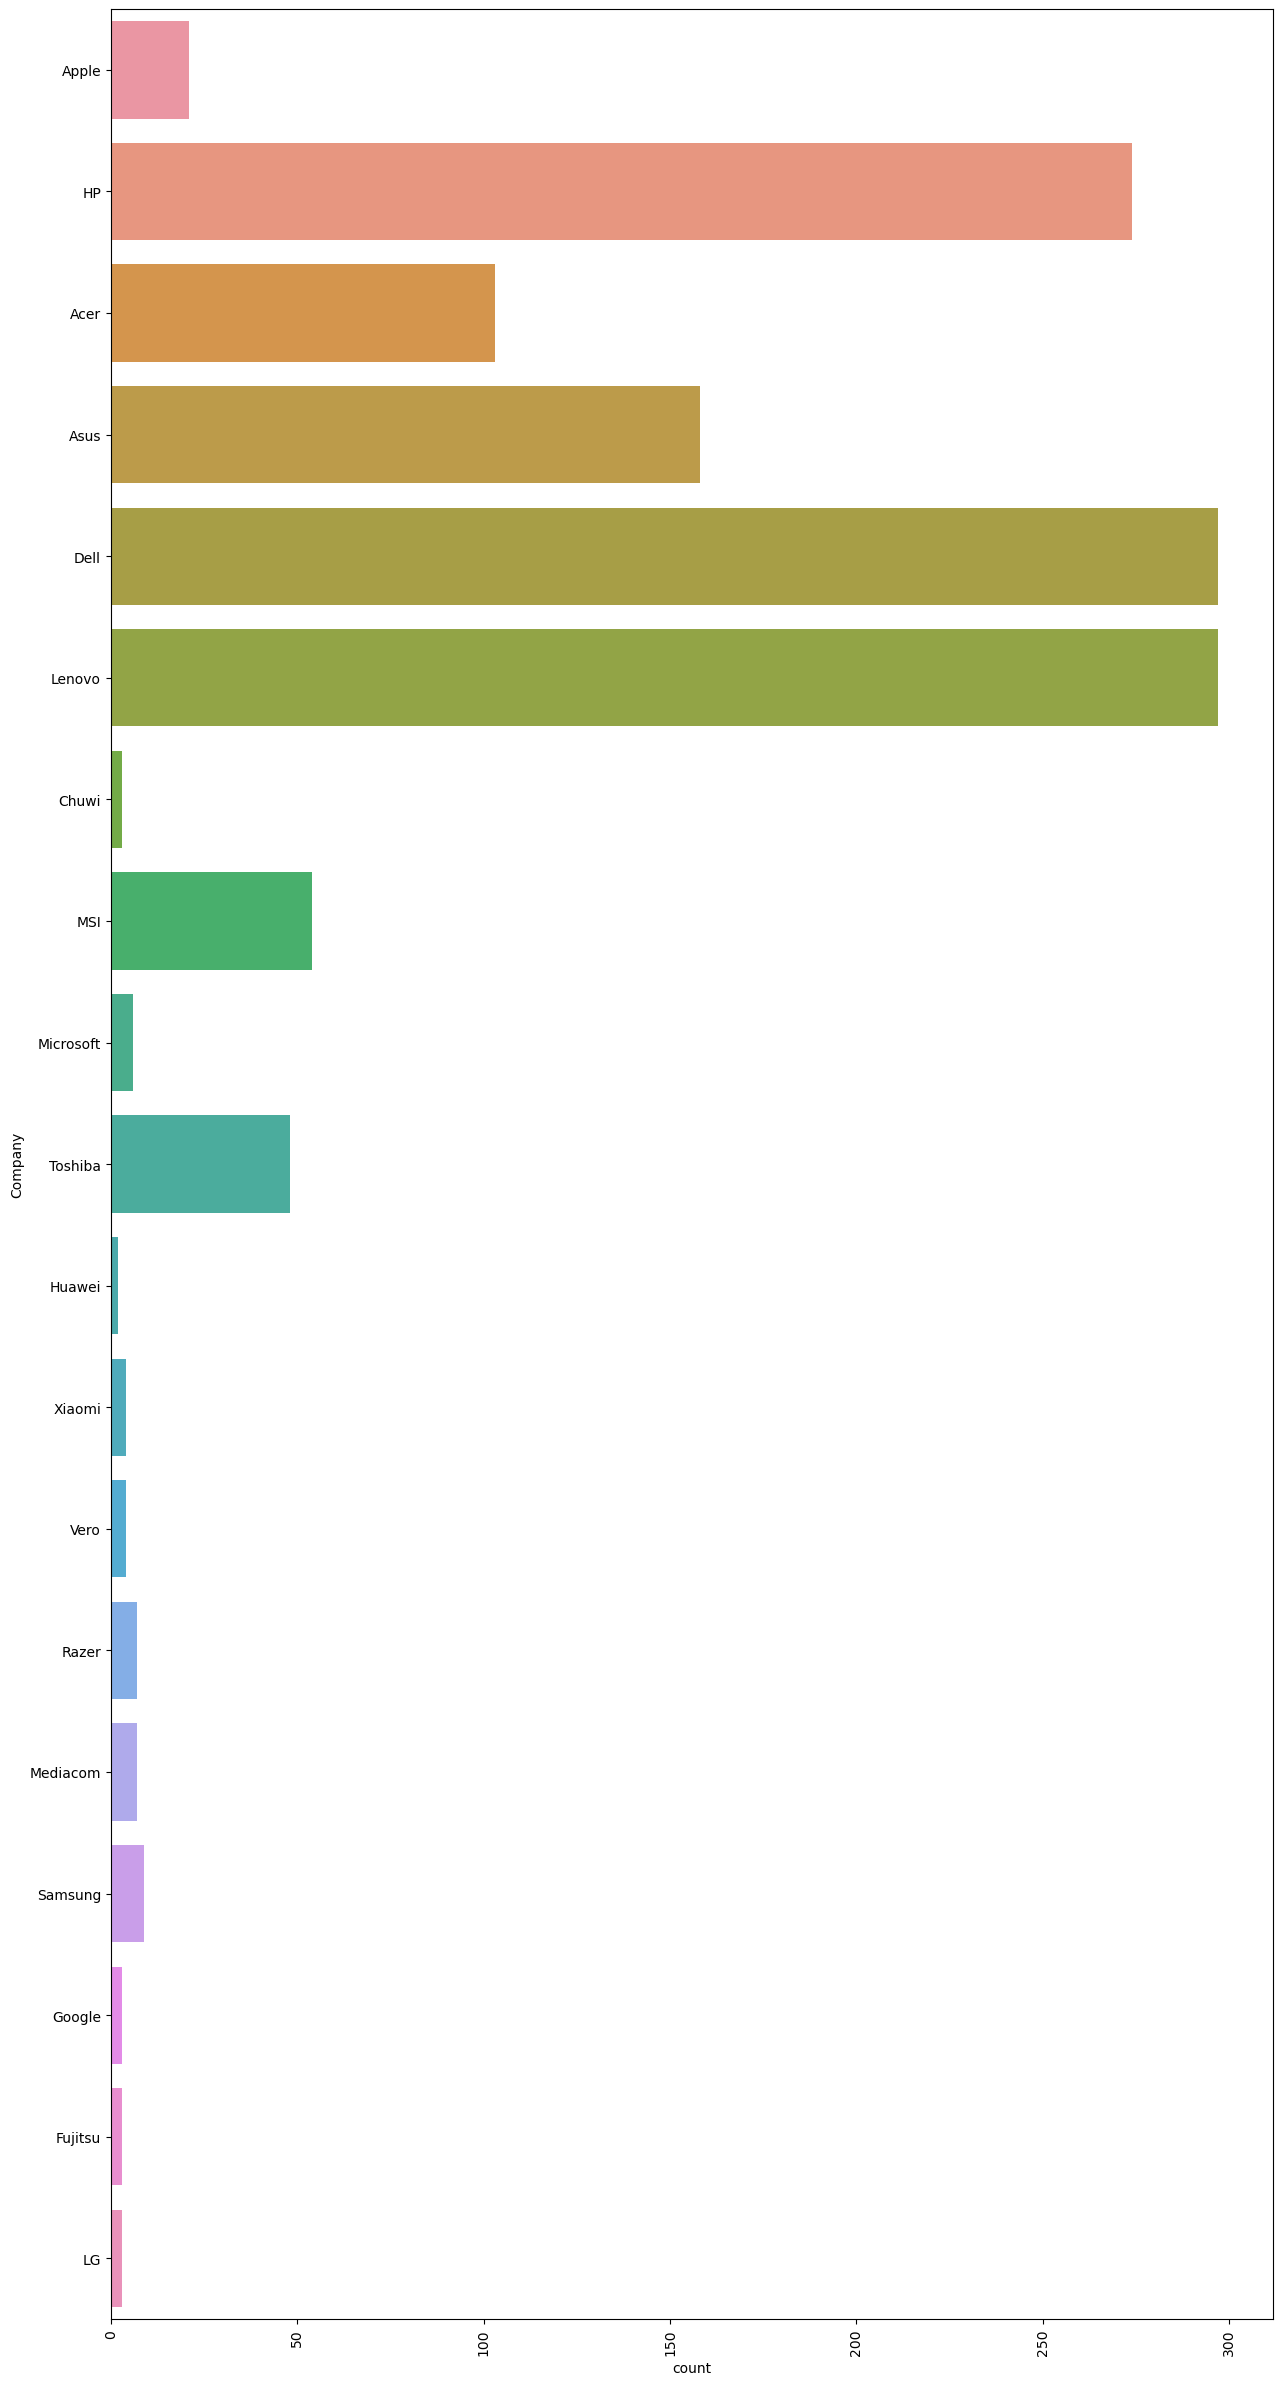

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


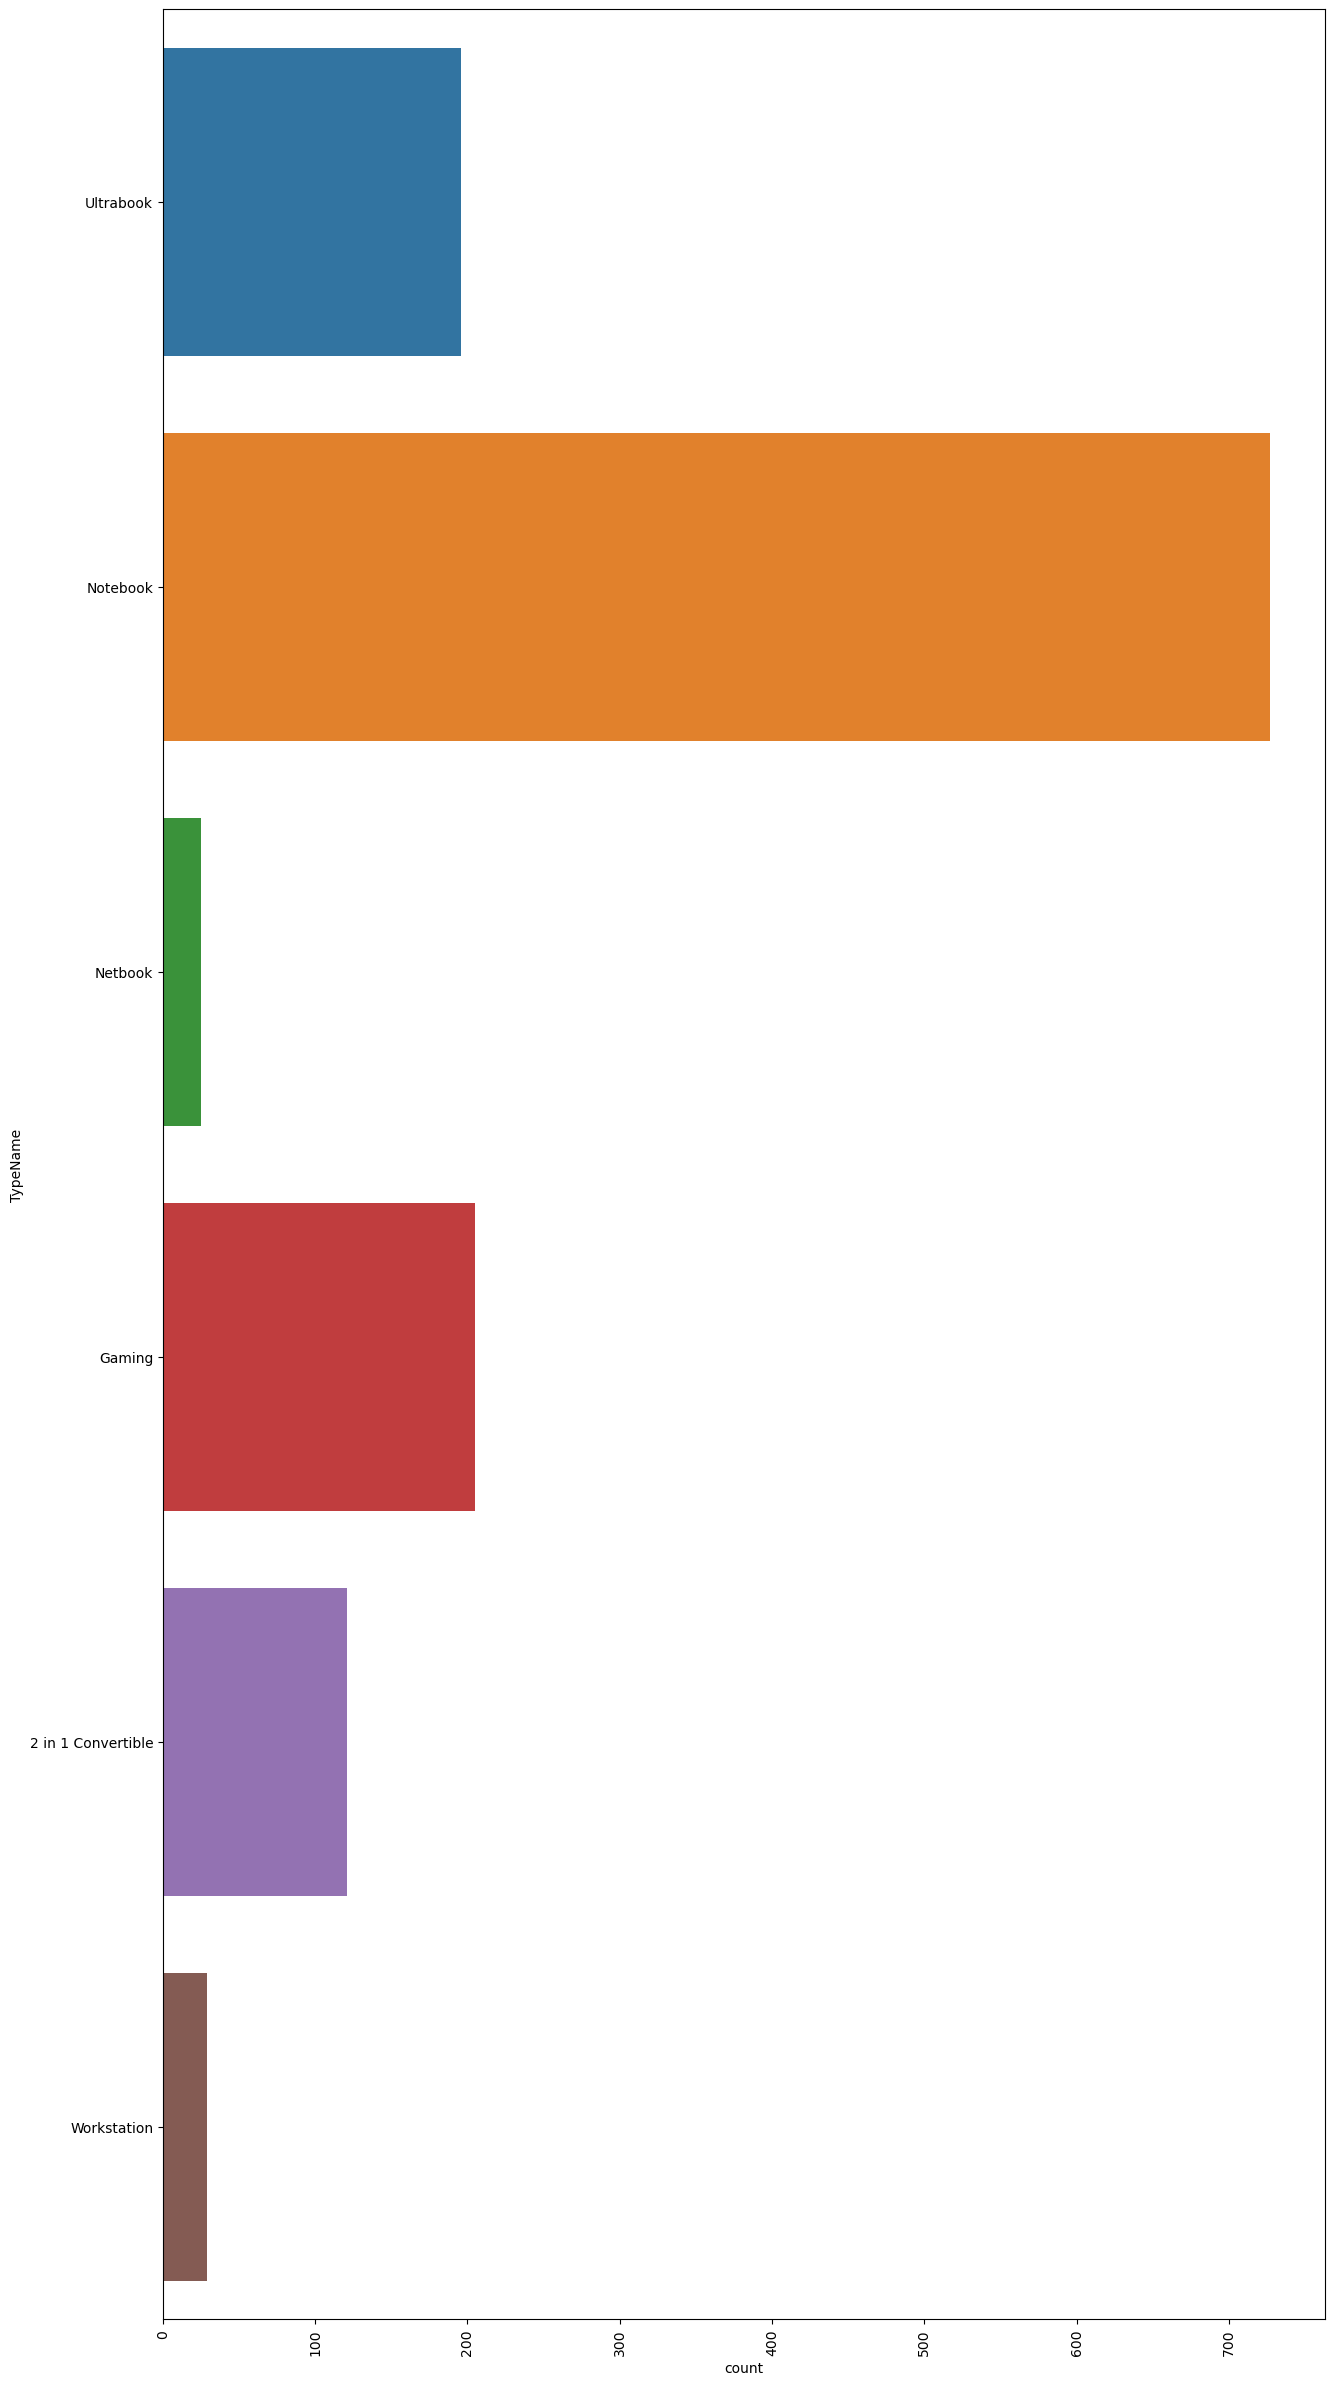

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


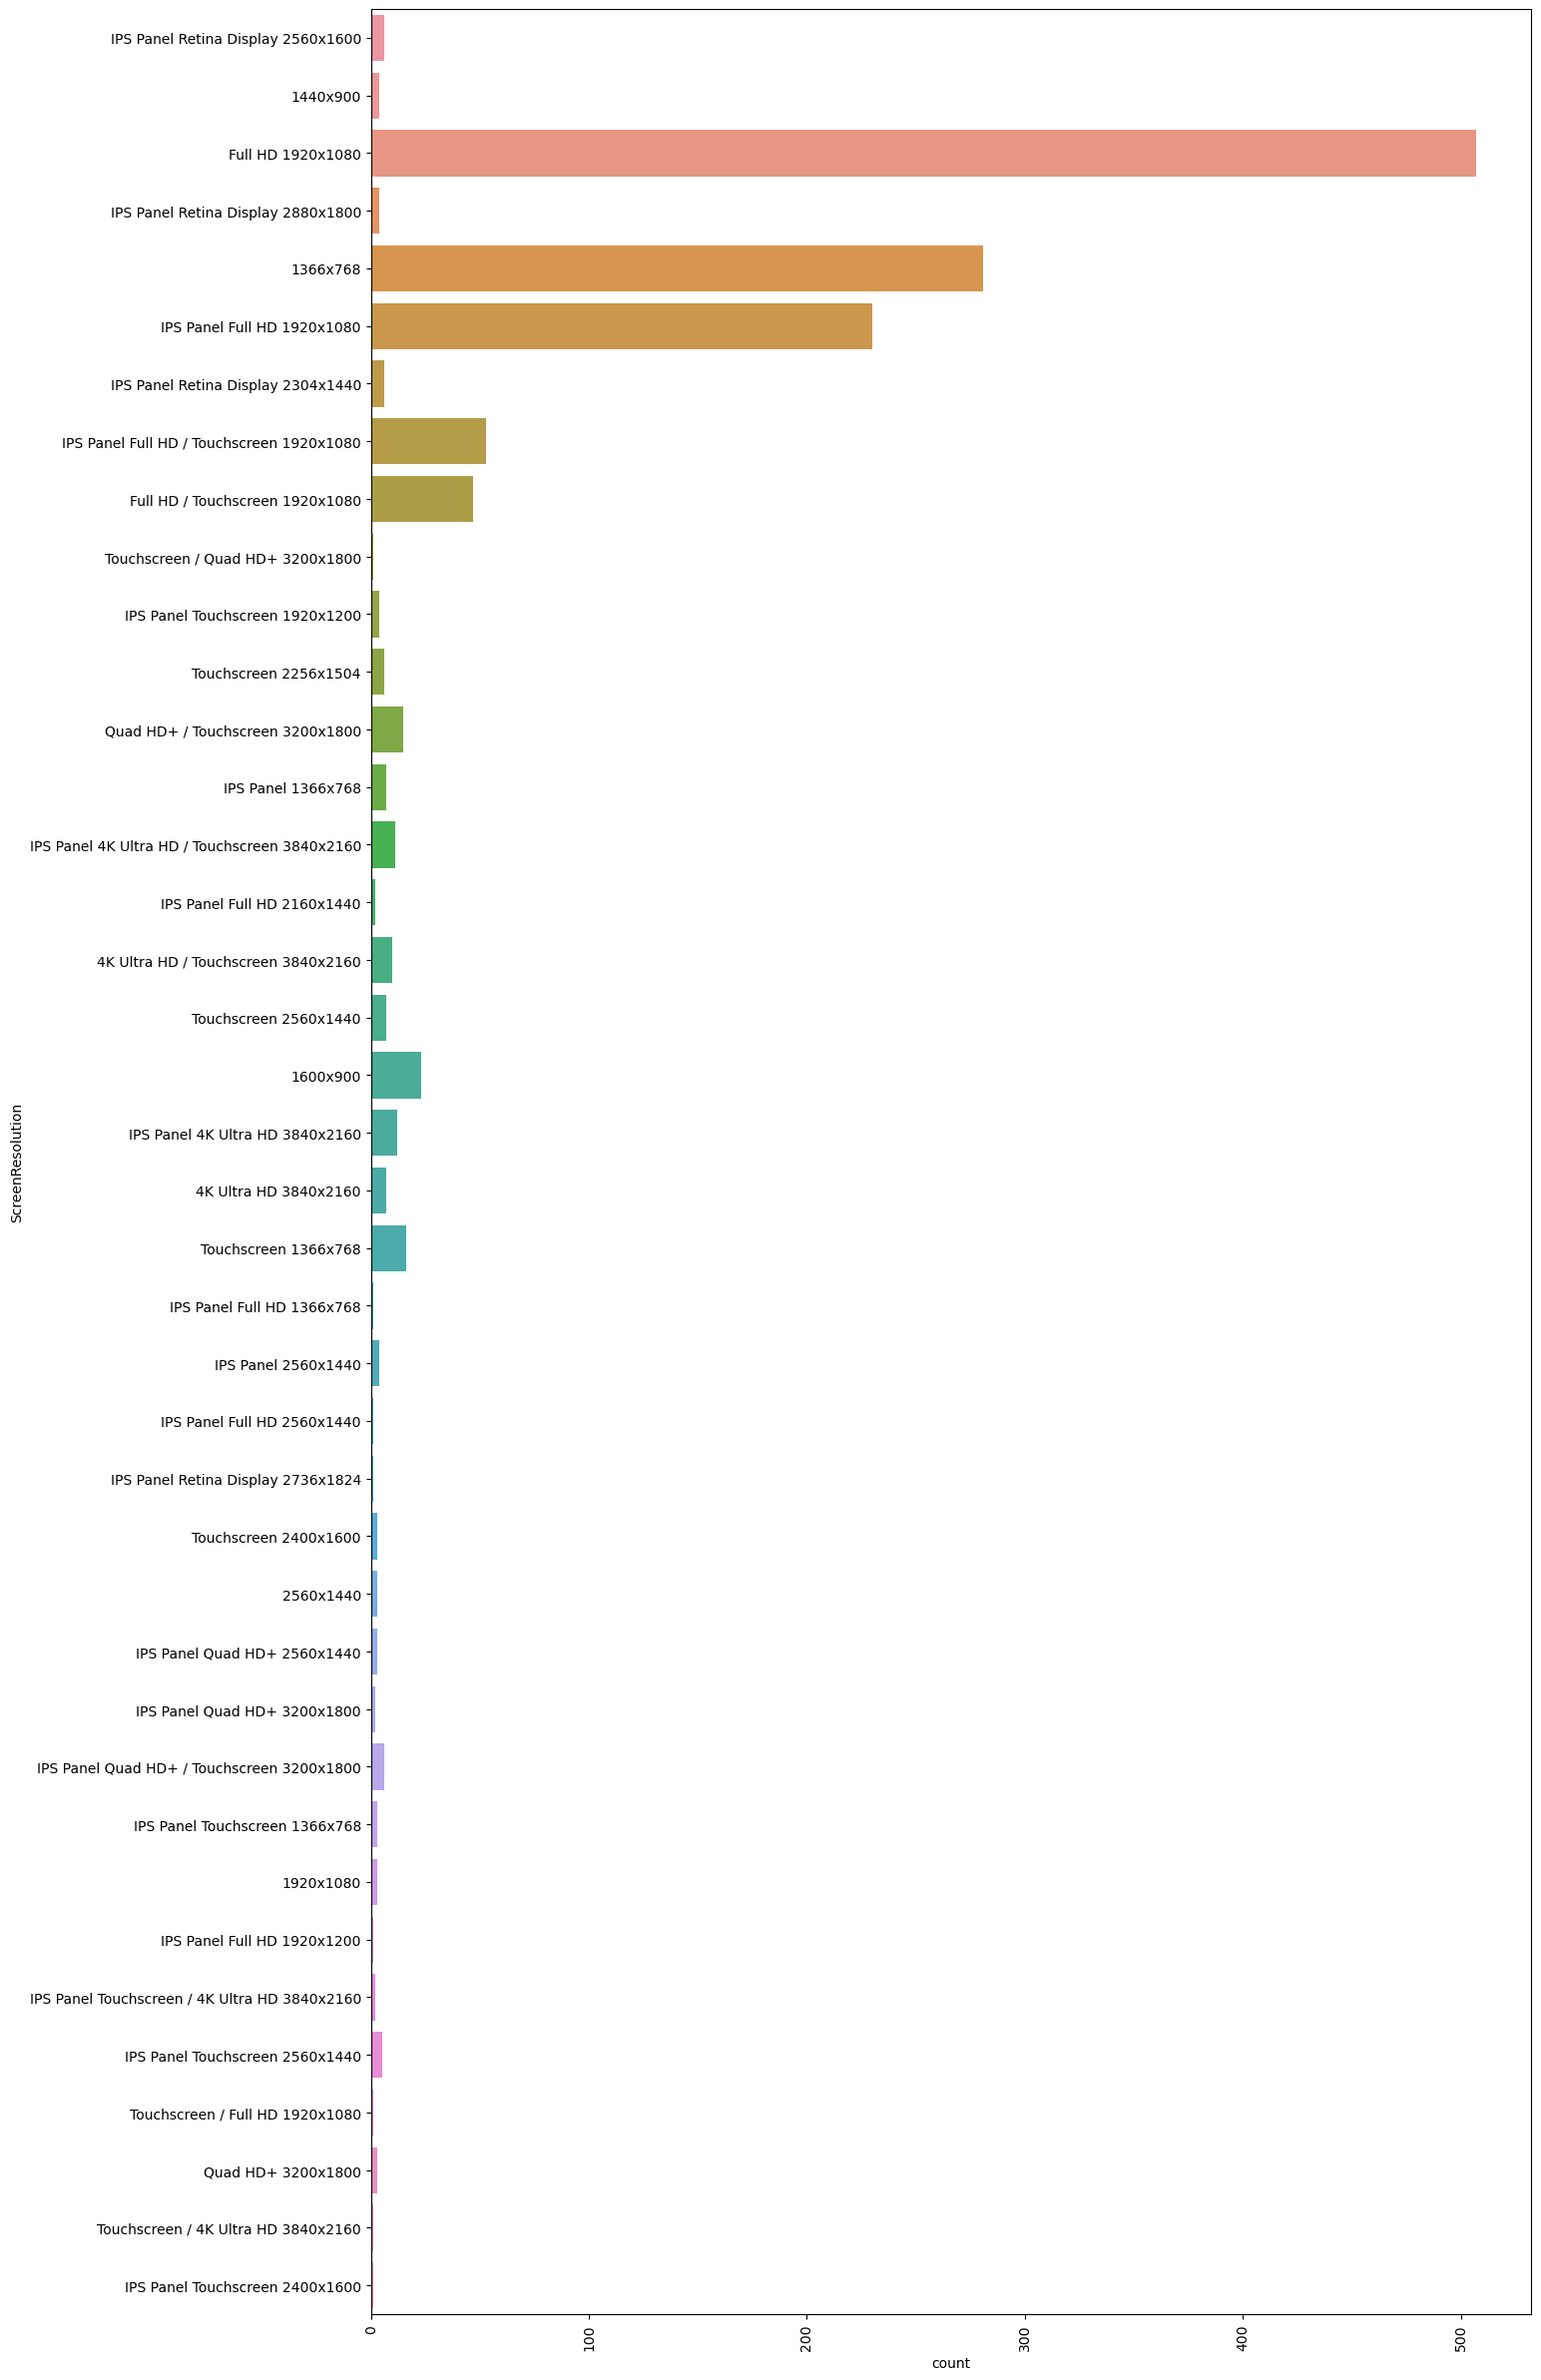

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


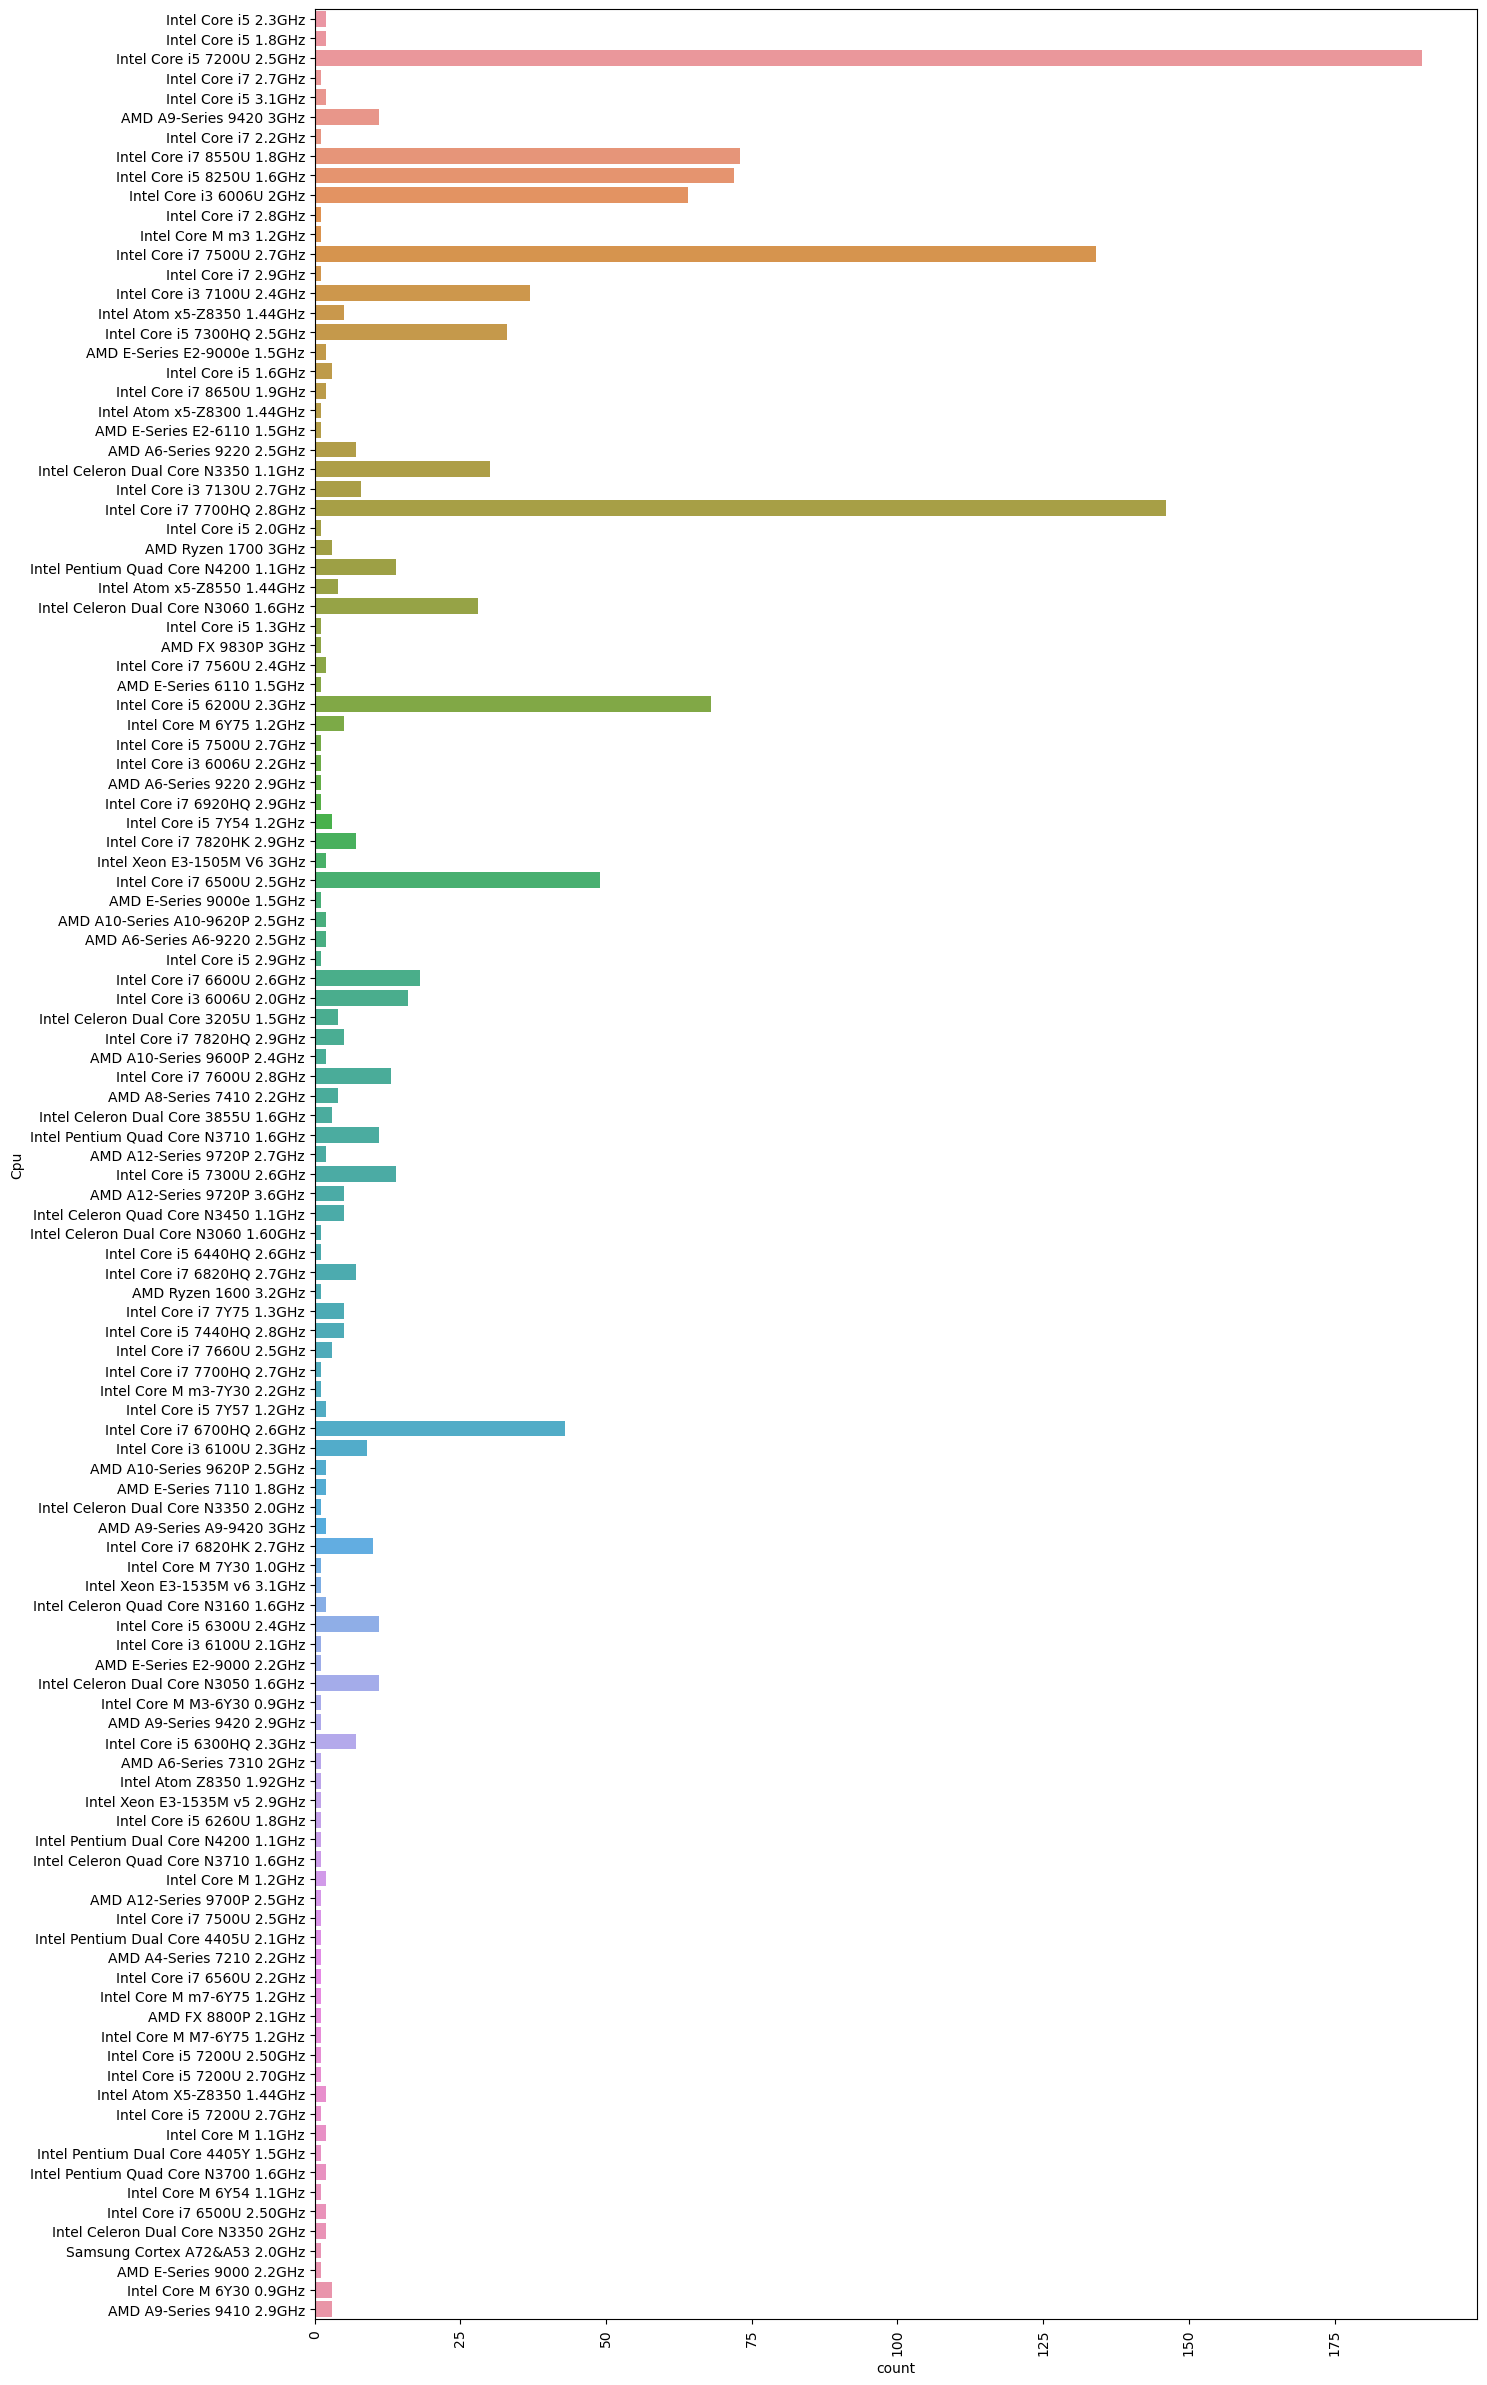

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


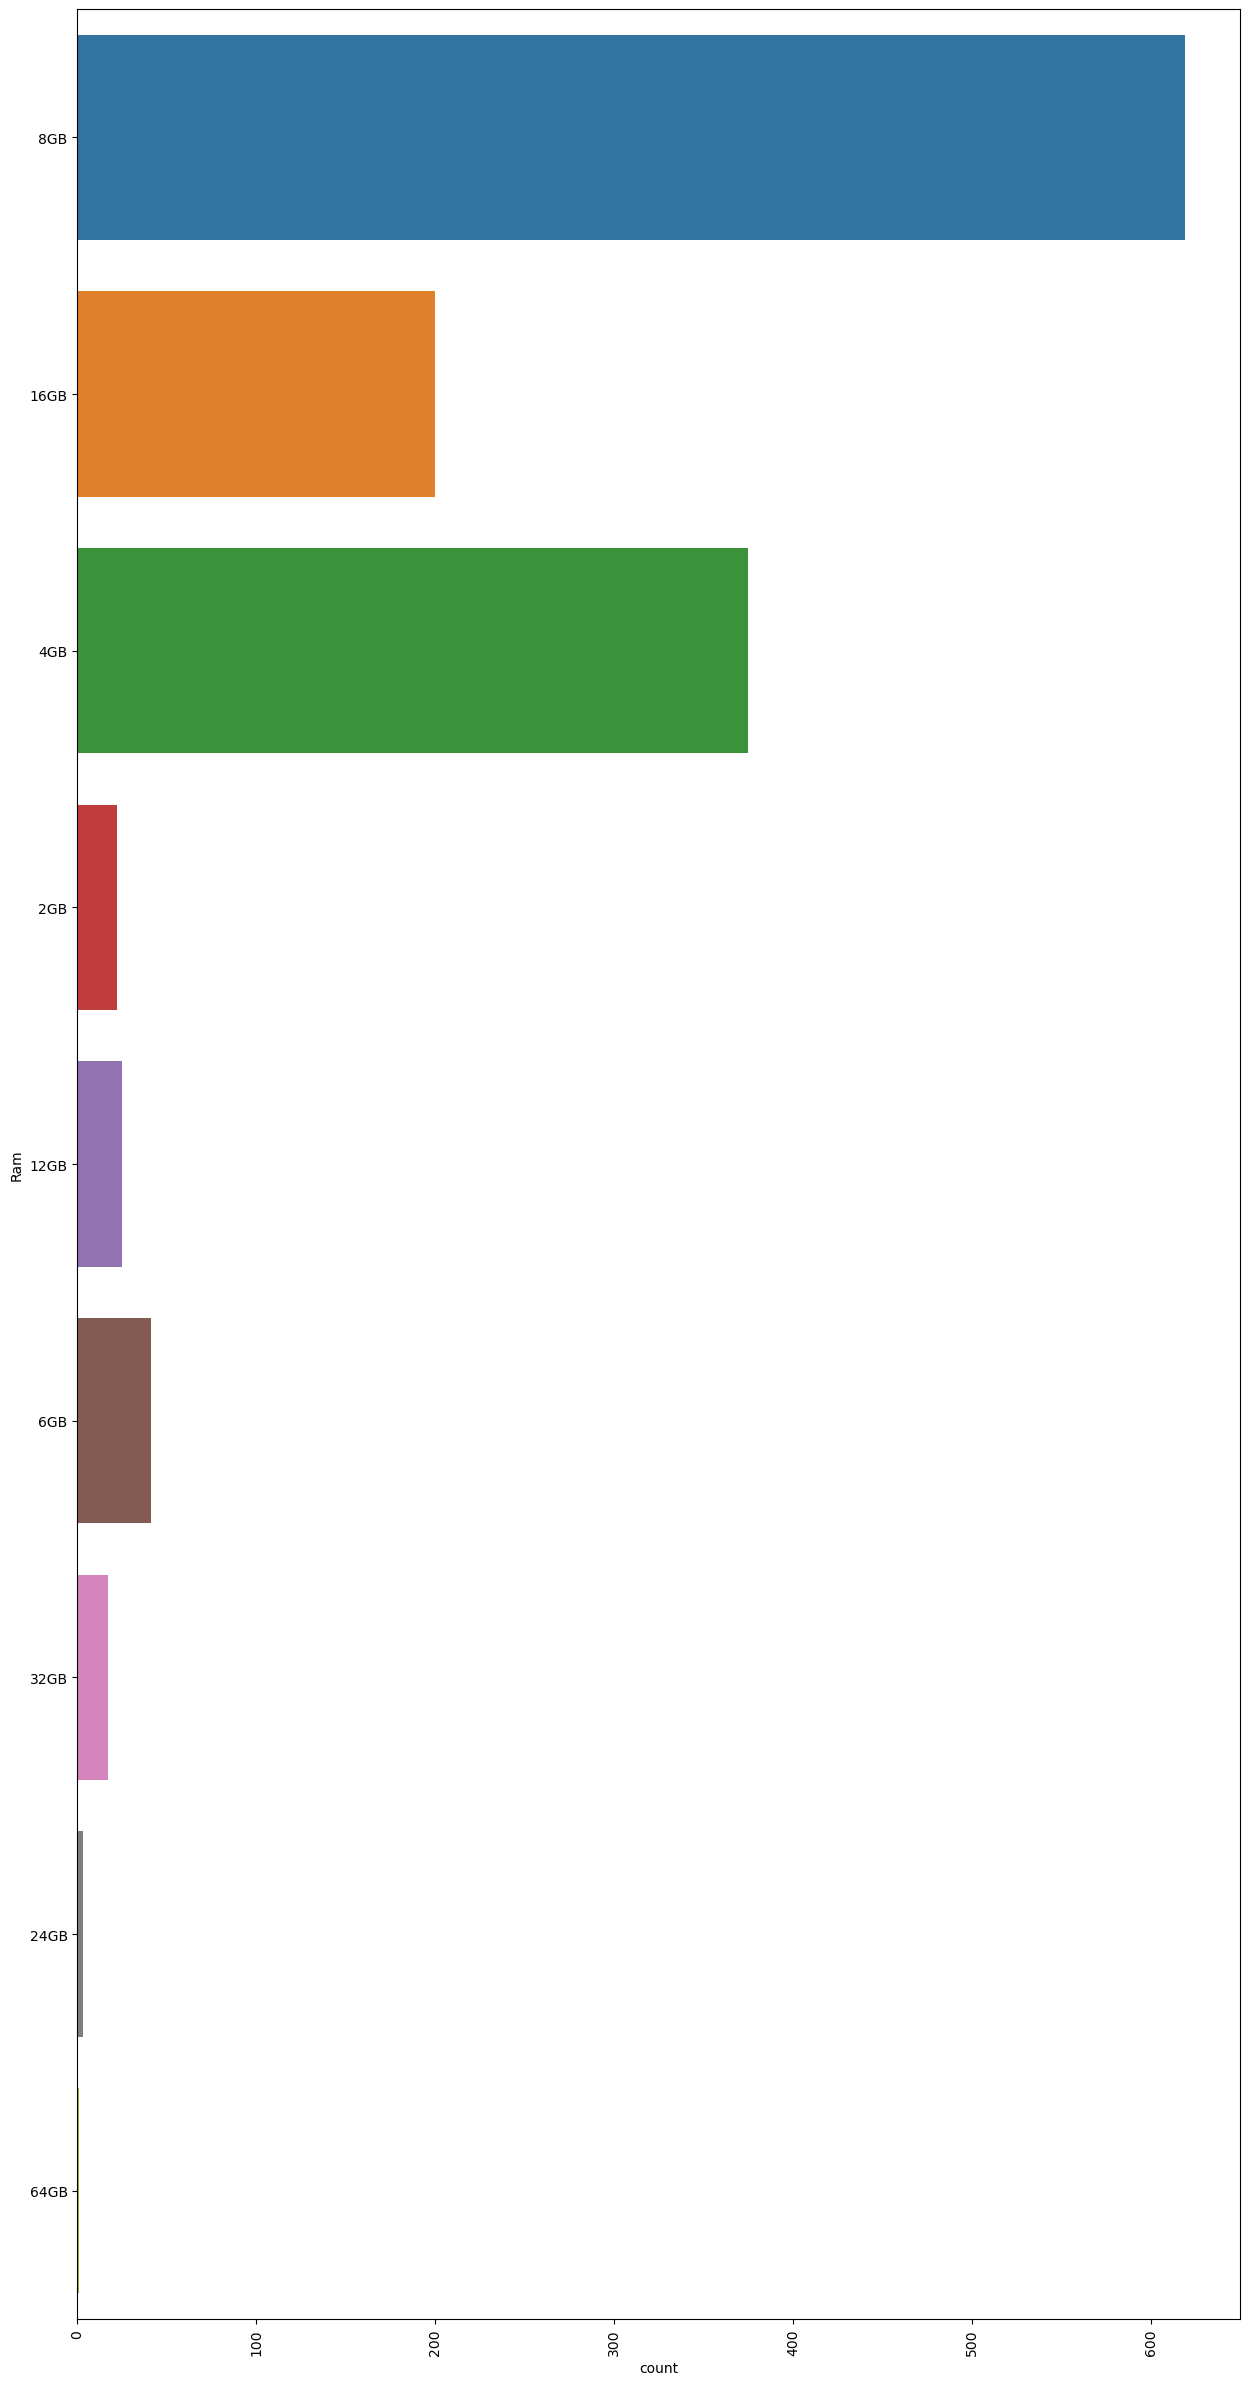

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


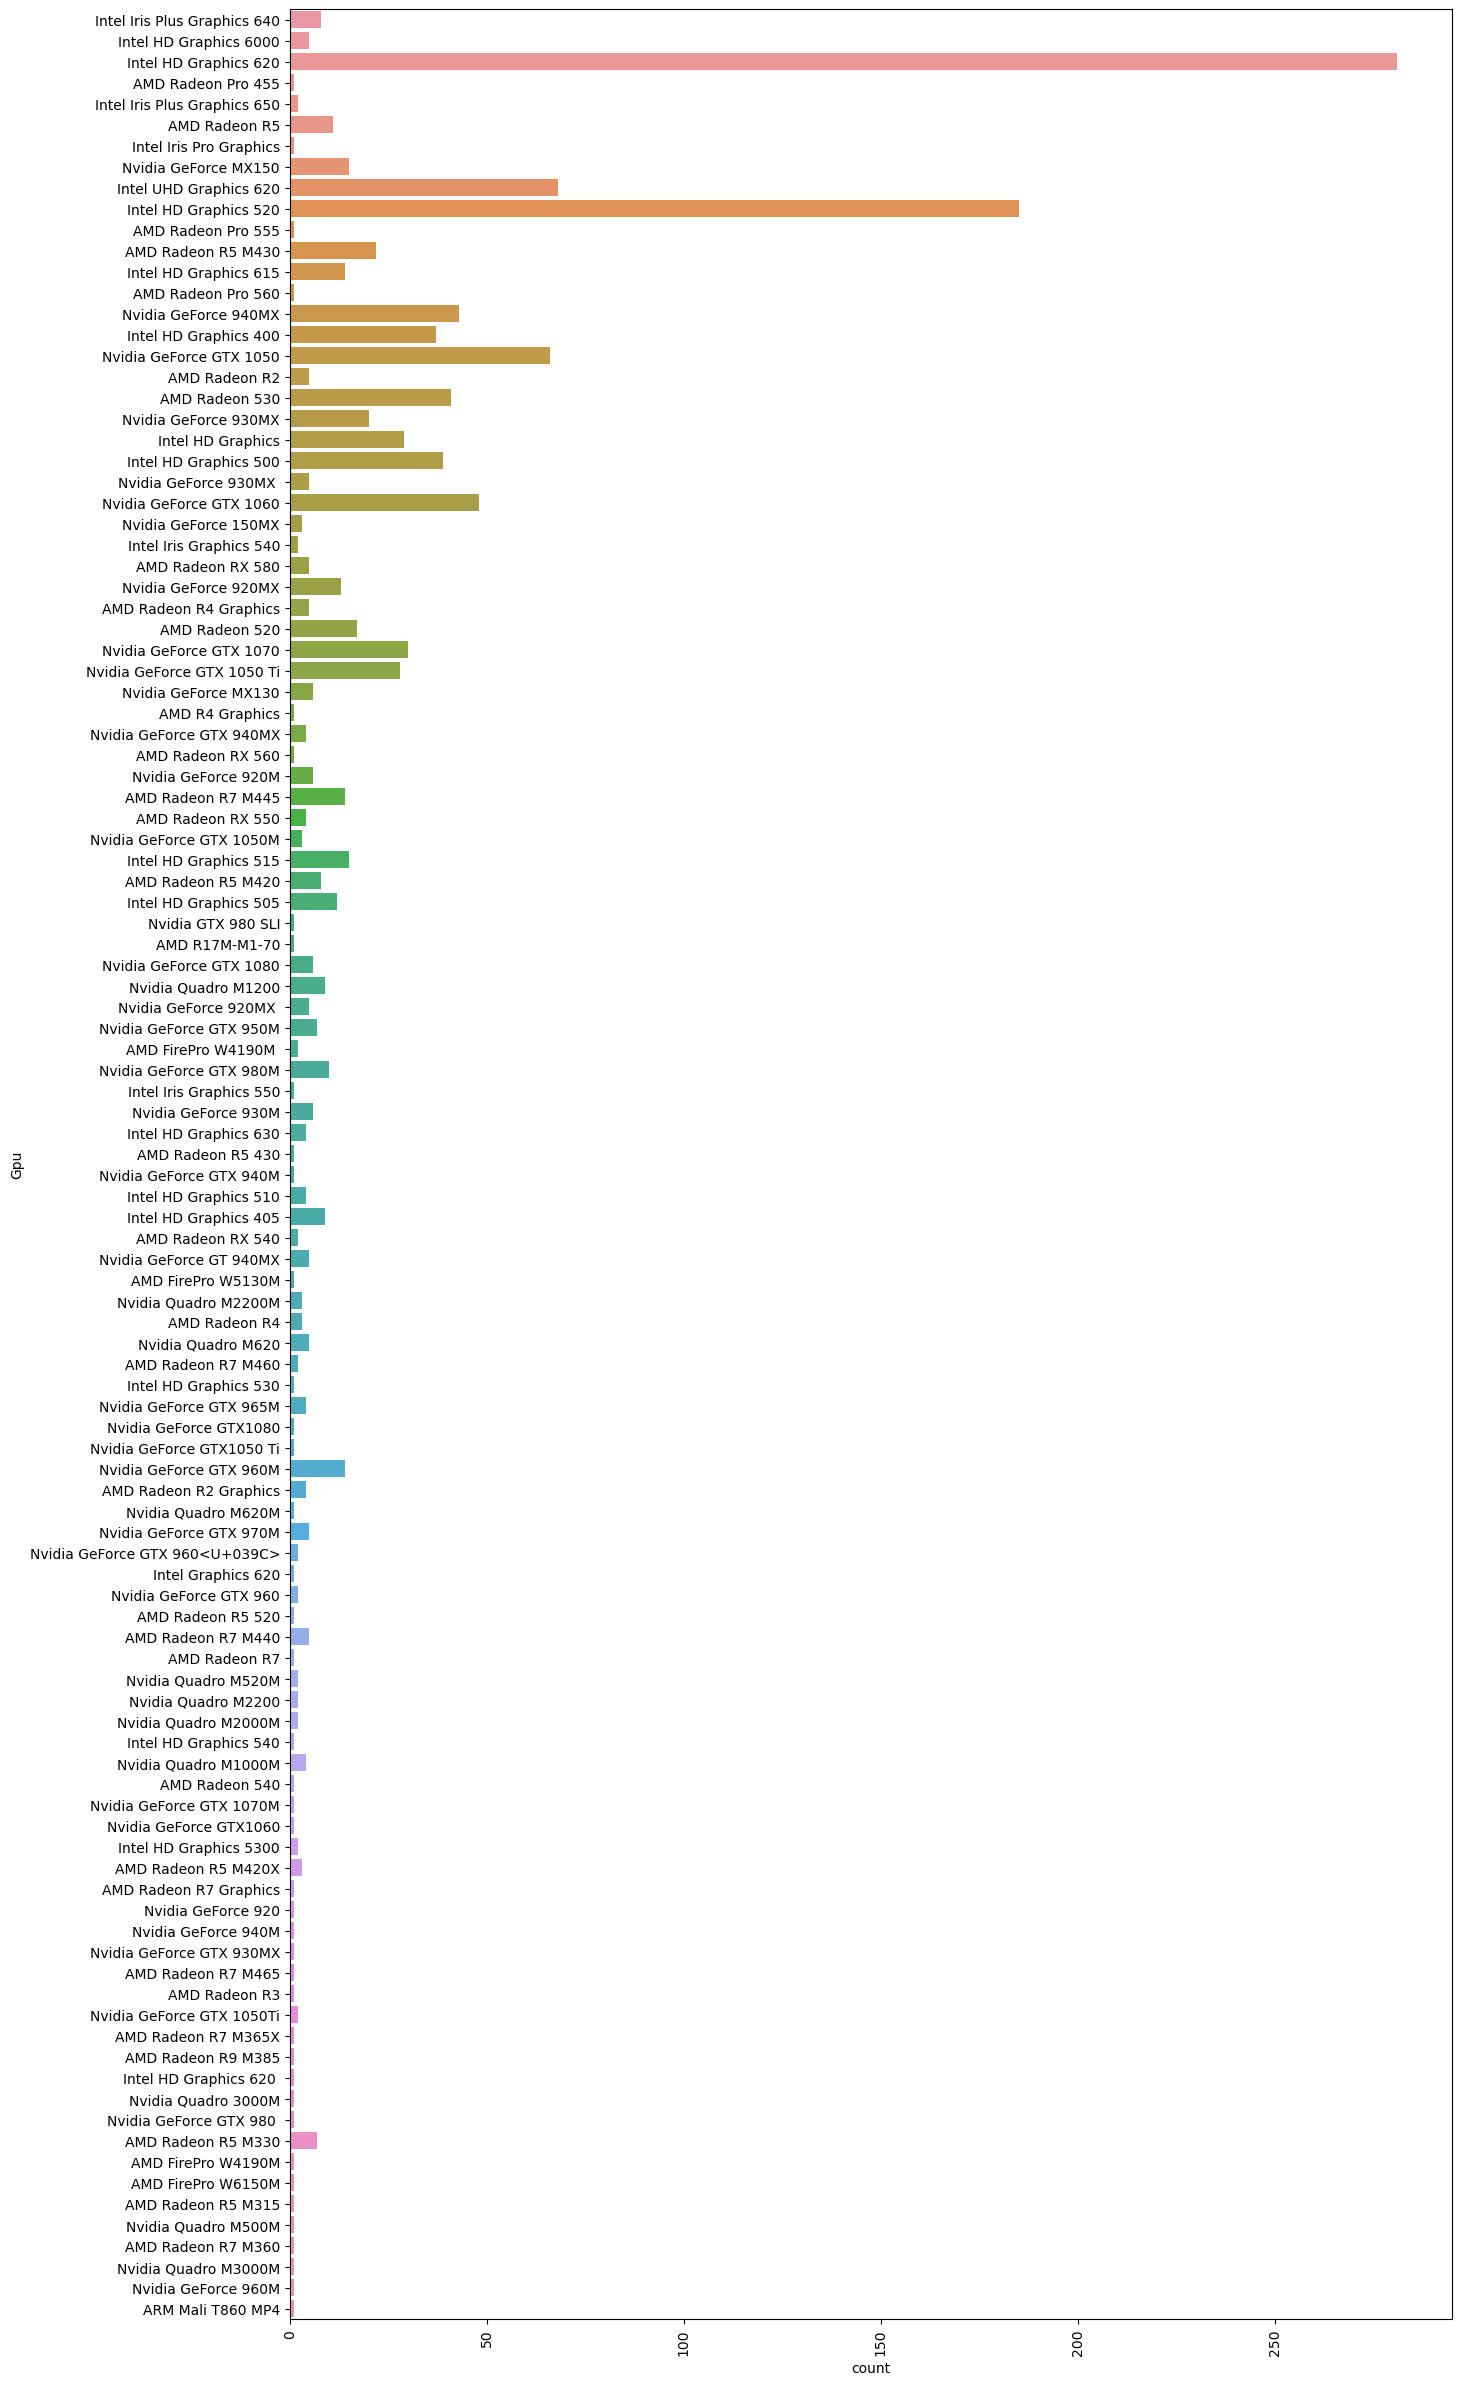

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


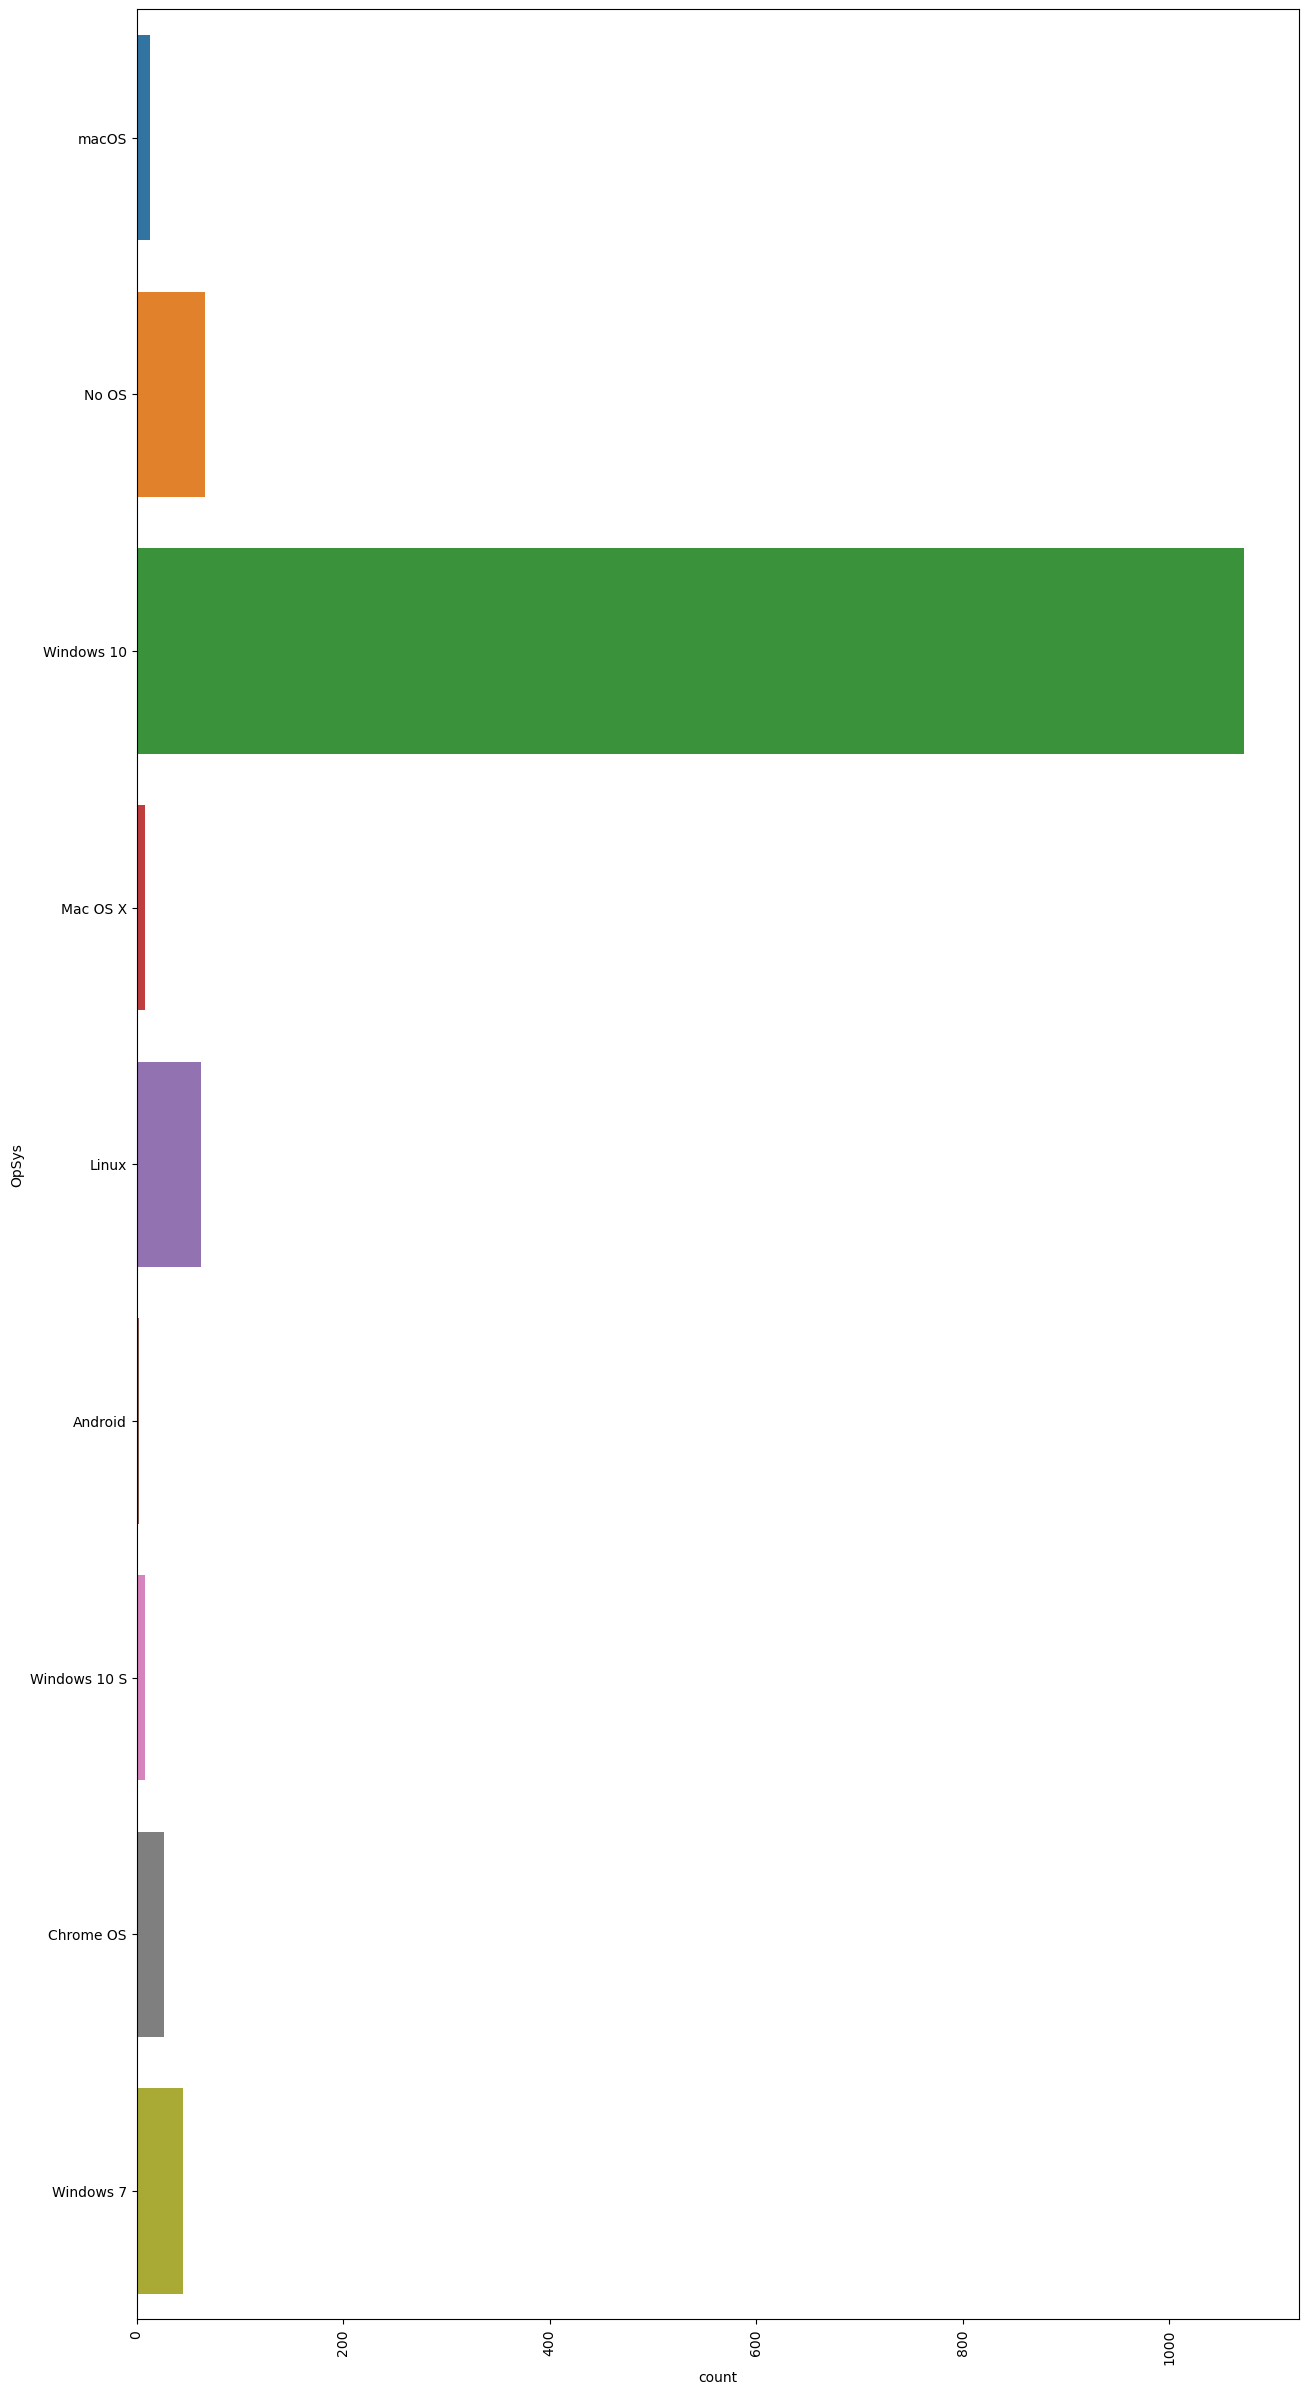

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


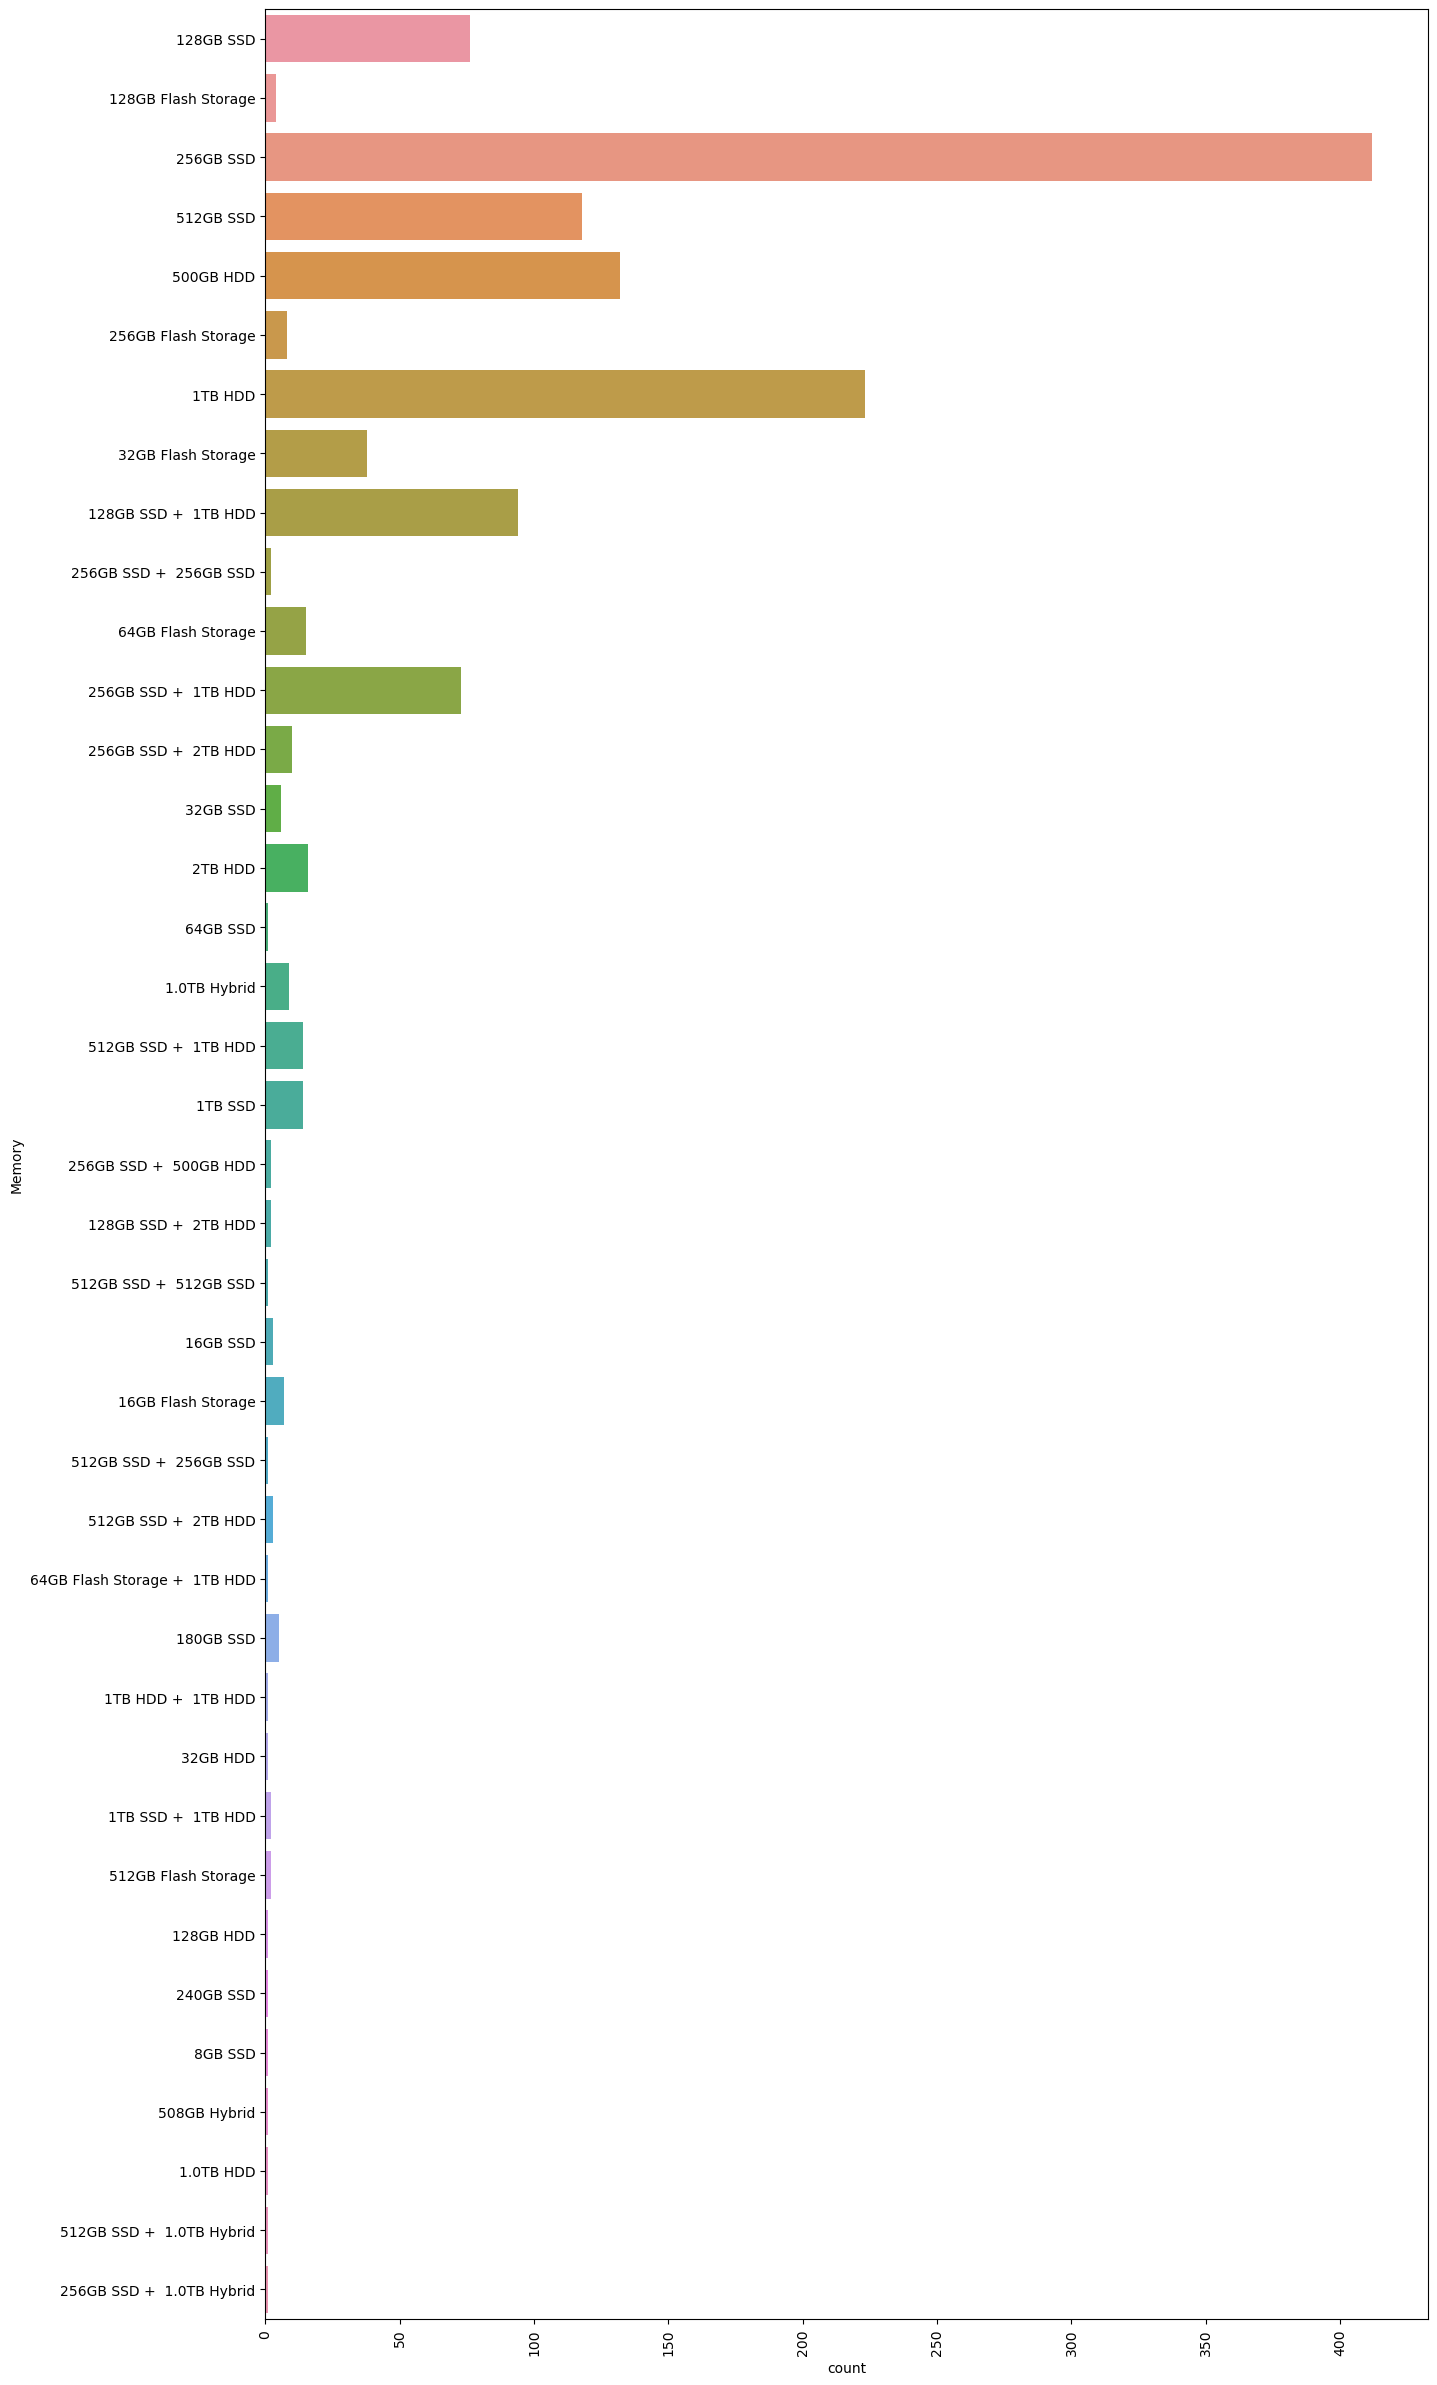

In [7]:
for col in categorical_cols:
    plt.figure(figsize=(15,30))
    sns.countplot(y=col, data=df)
    plt.xticks(rotation=90)  
    plt.show()

In [8]:
numerical_cols = ['Inches', 'Weight',  'Price_euros']


C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


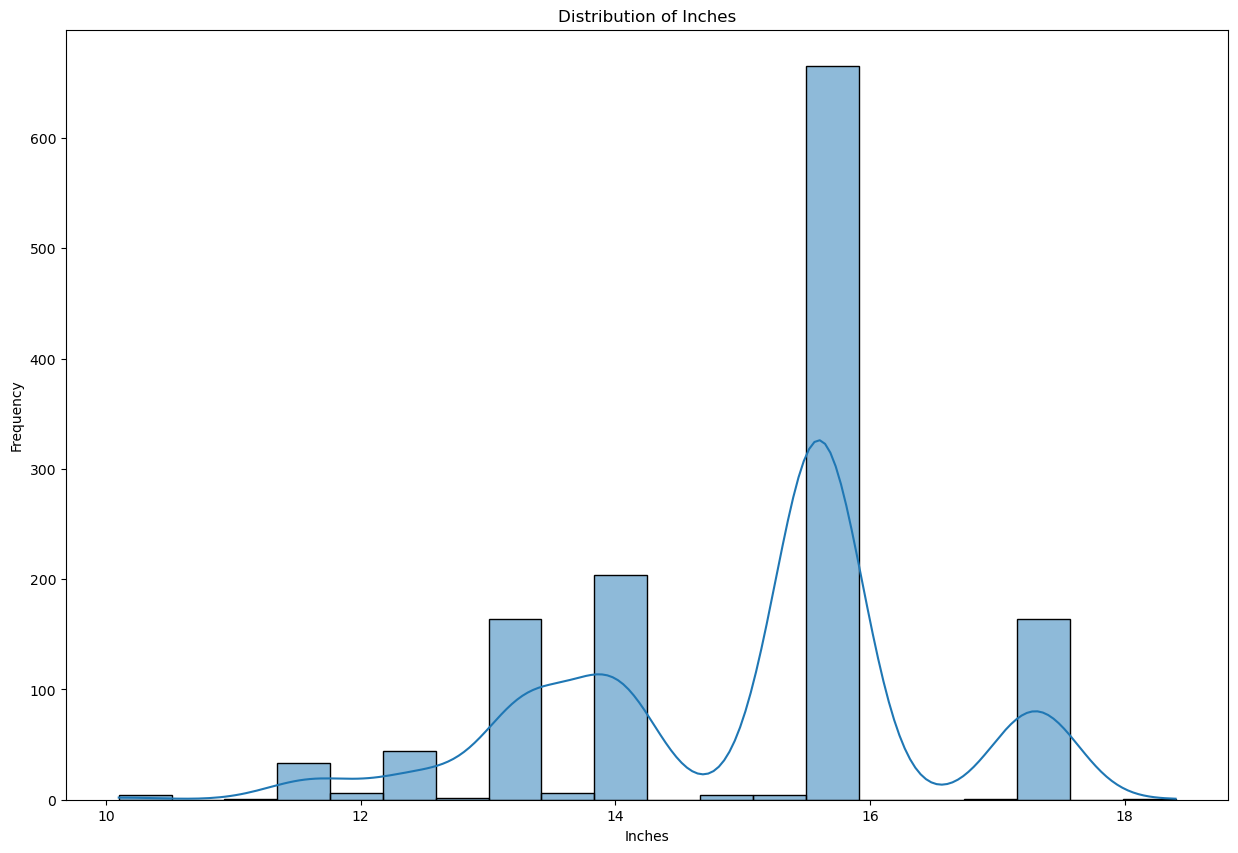

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


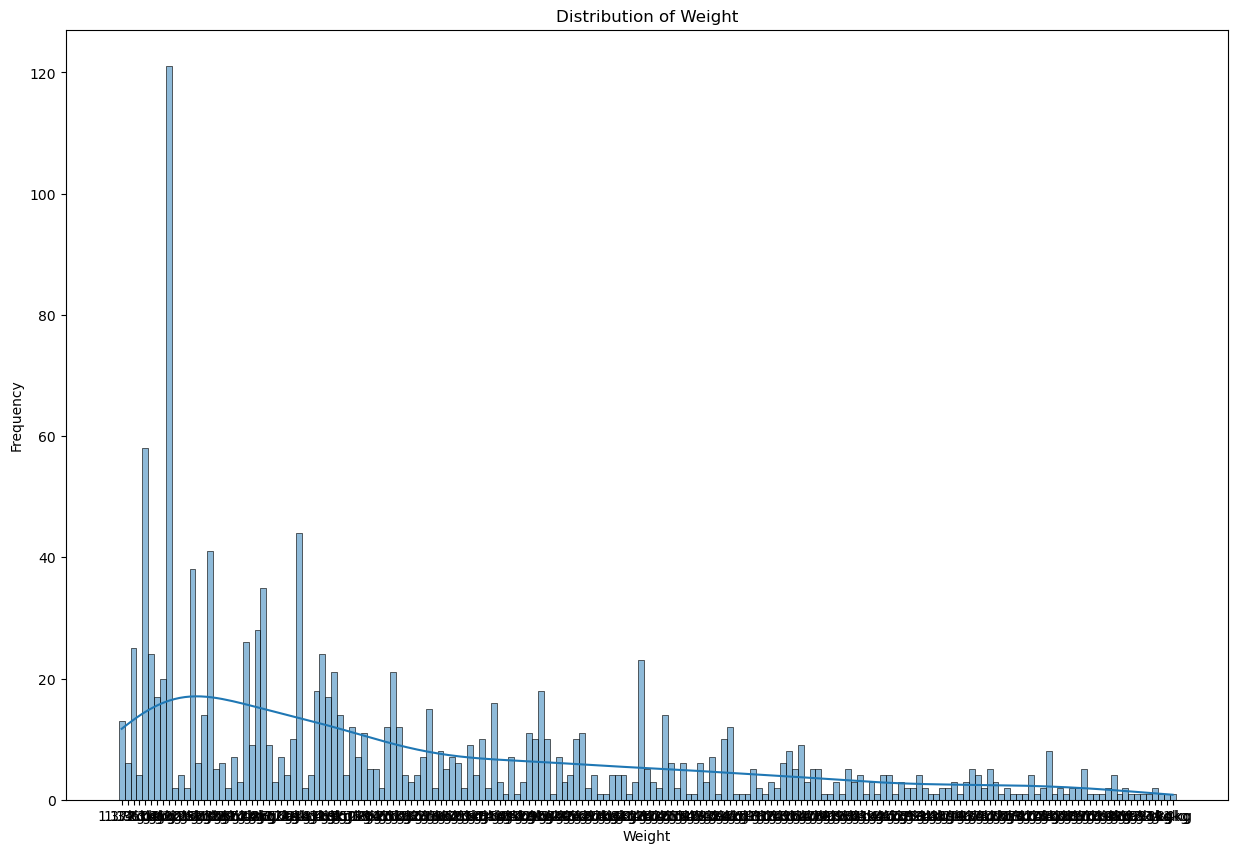

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


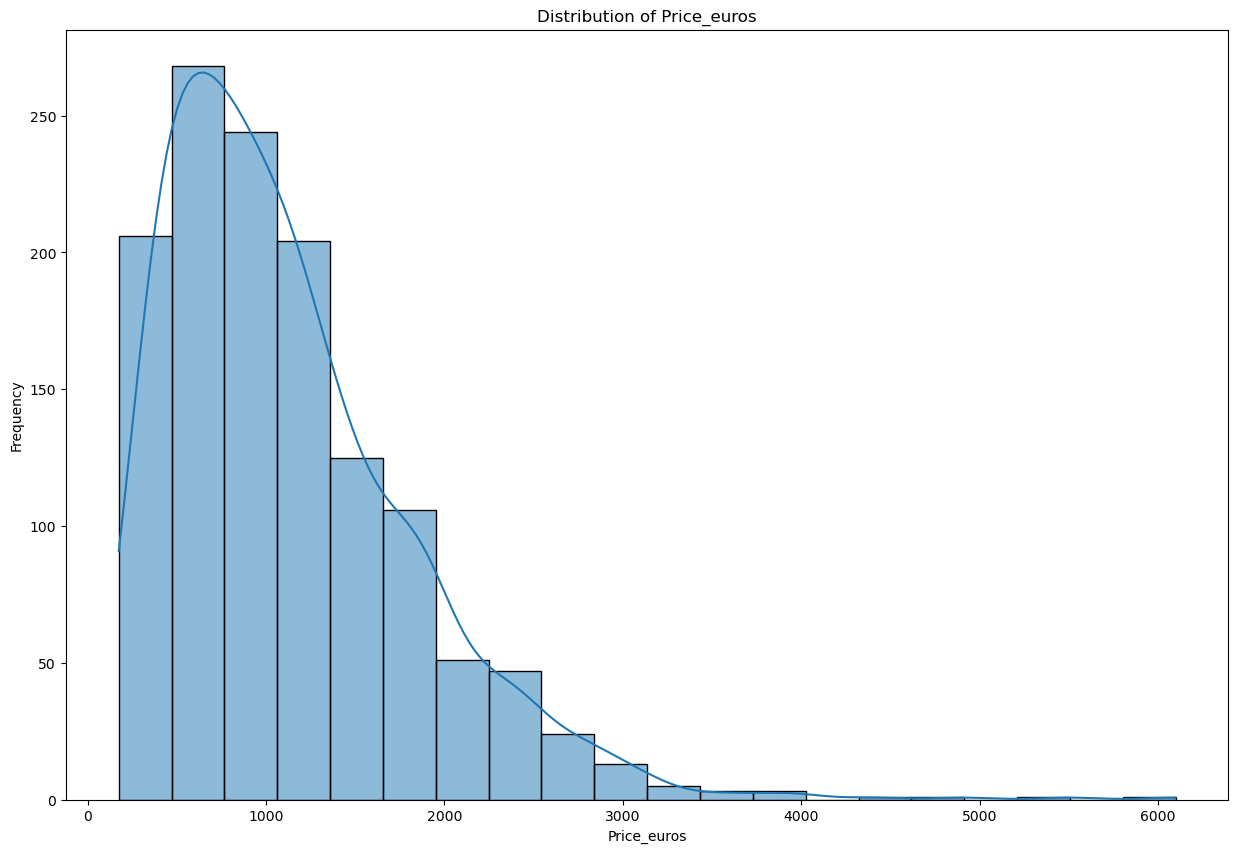

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(15,10))
    sns.histplot(df[col], bins=20, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


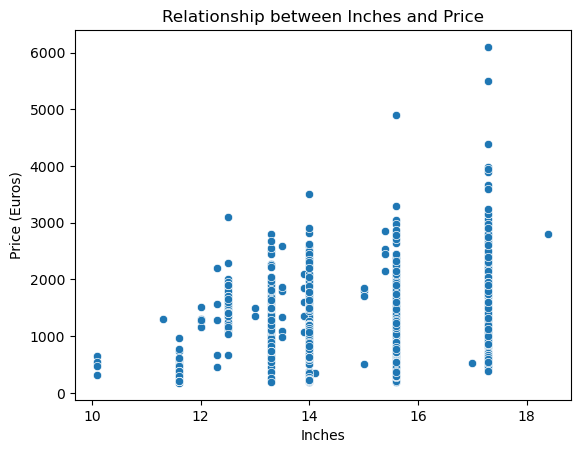

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


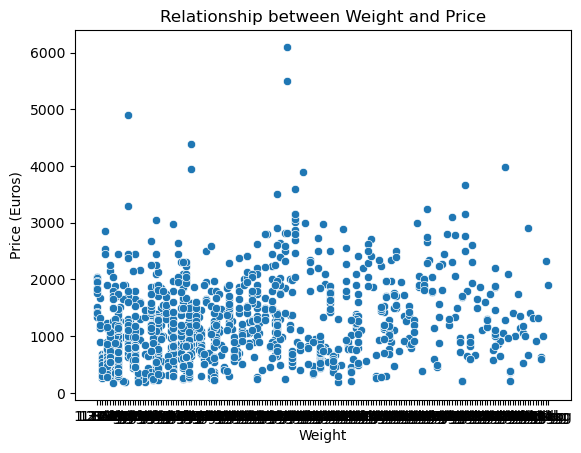

In [10]:
numerical_cols = ['Inches', 'Weight']
for col in numerical_cols:
    sns.scatterplot(x=col, y='Price_euros', data=df)
    plt.xlabel(col)
    plt.ylabel('Price (Euros)')
    plt.title(f'Relationship between {col} and Price')
    plt.show()

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


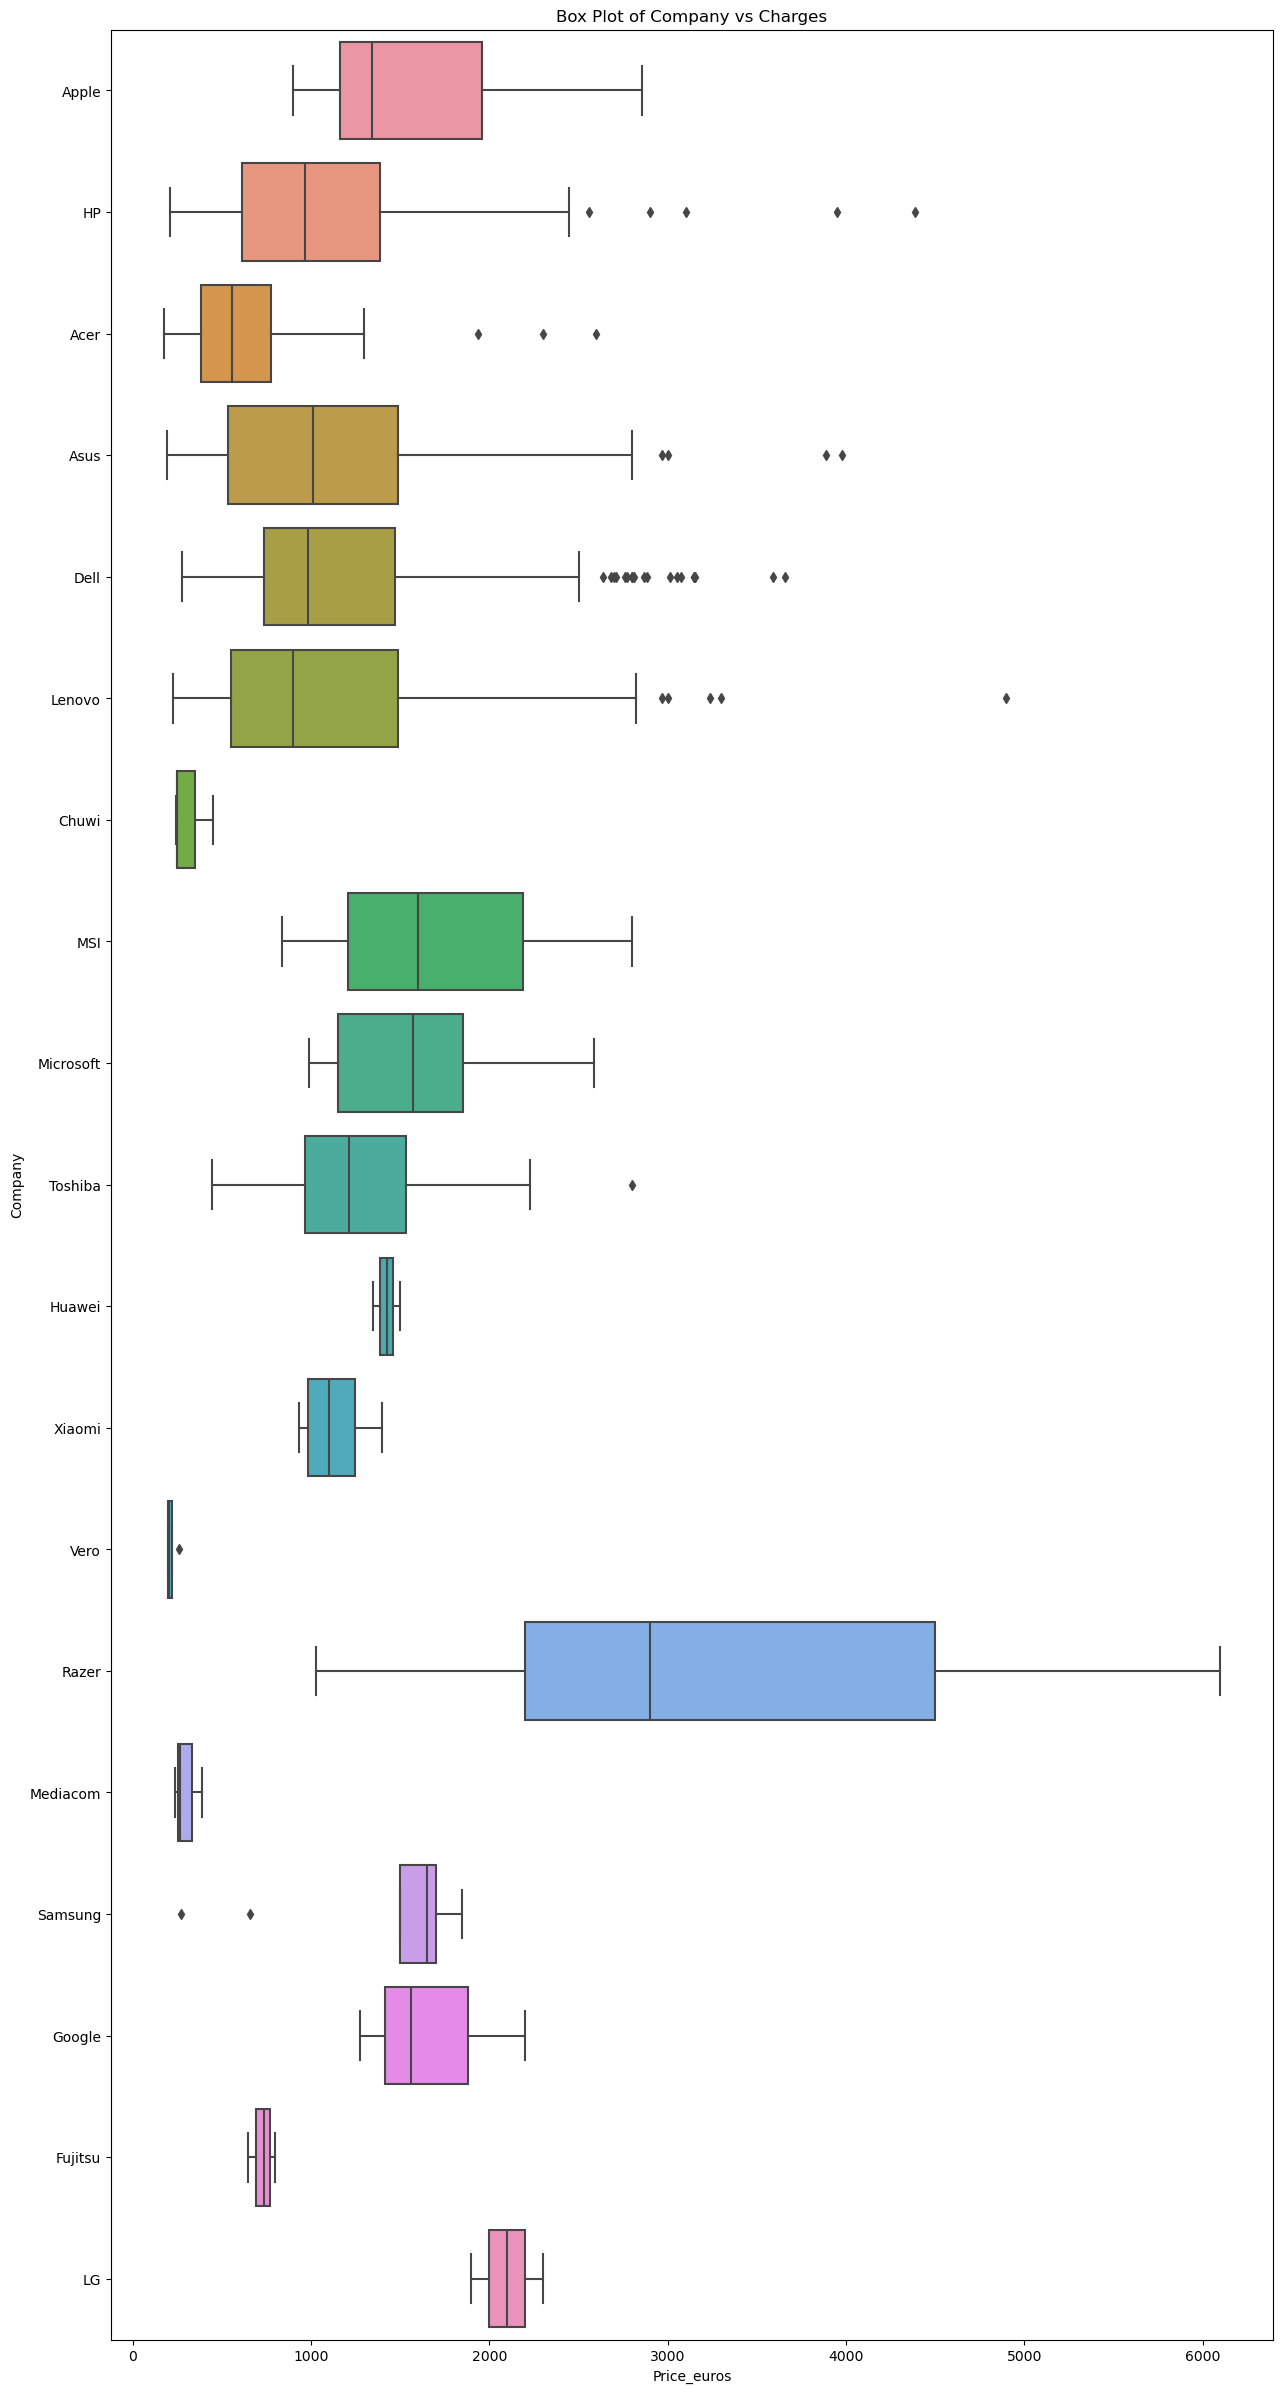

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


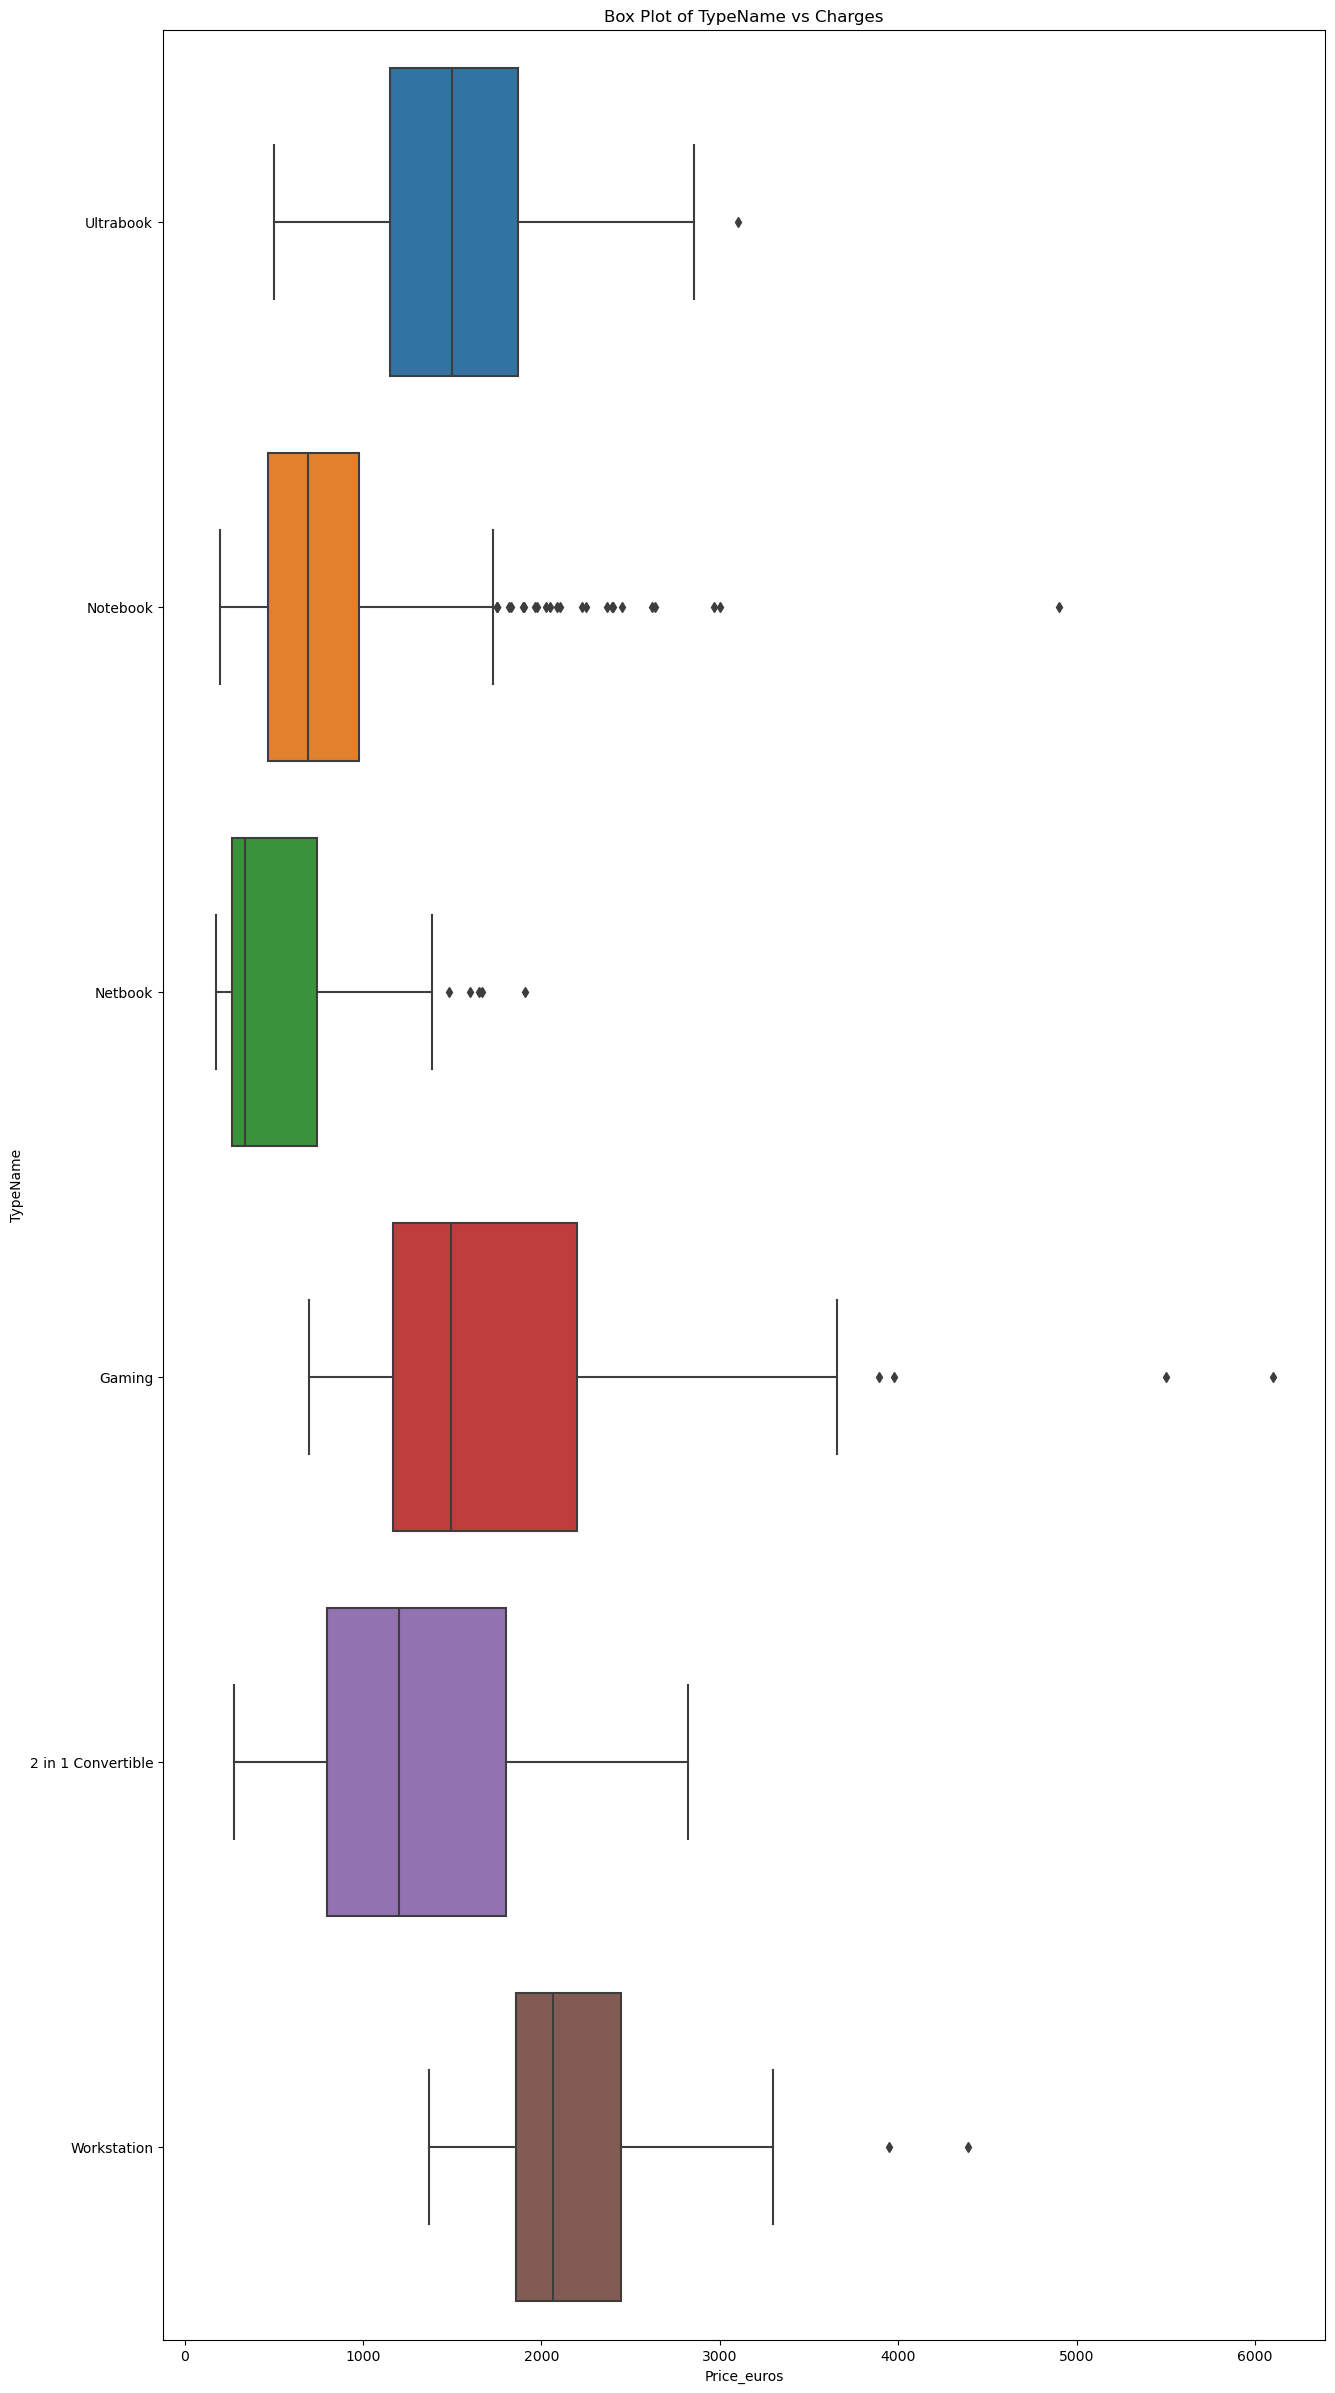

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


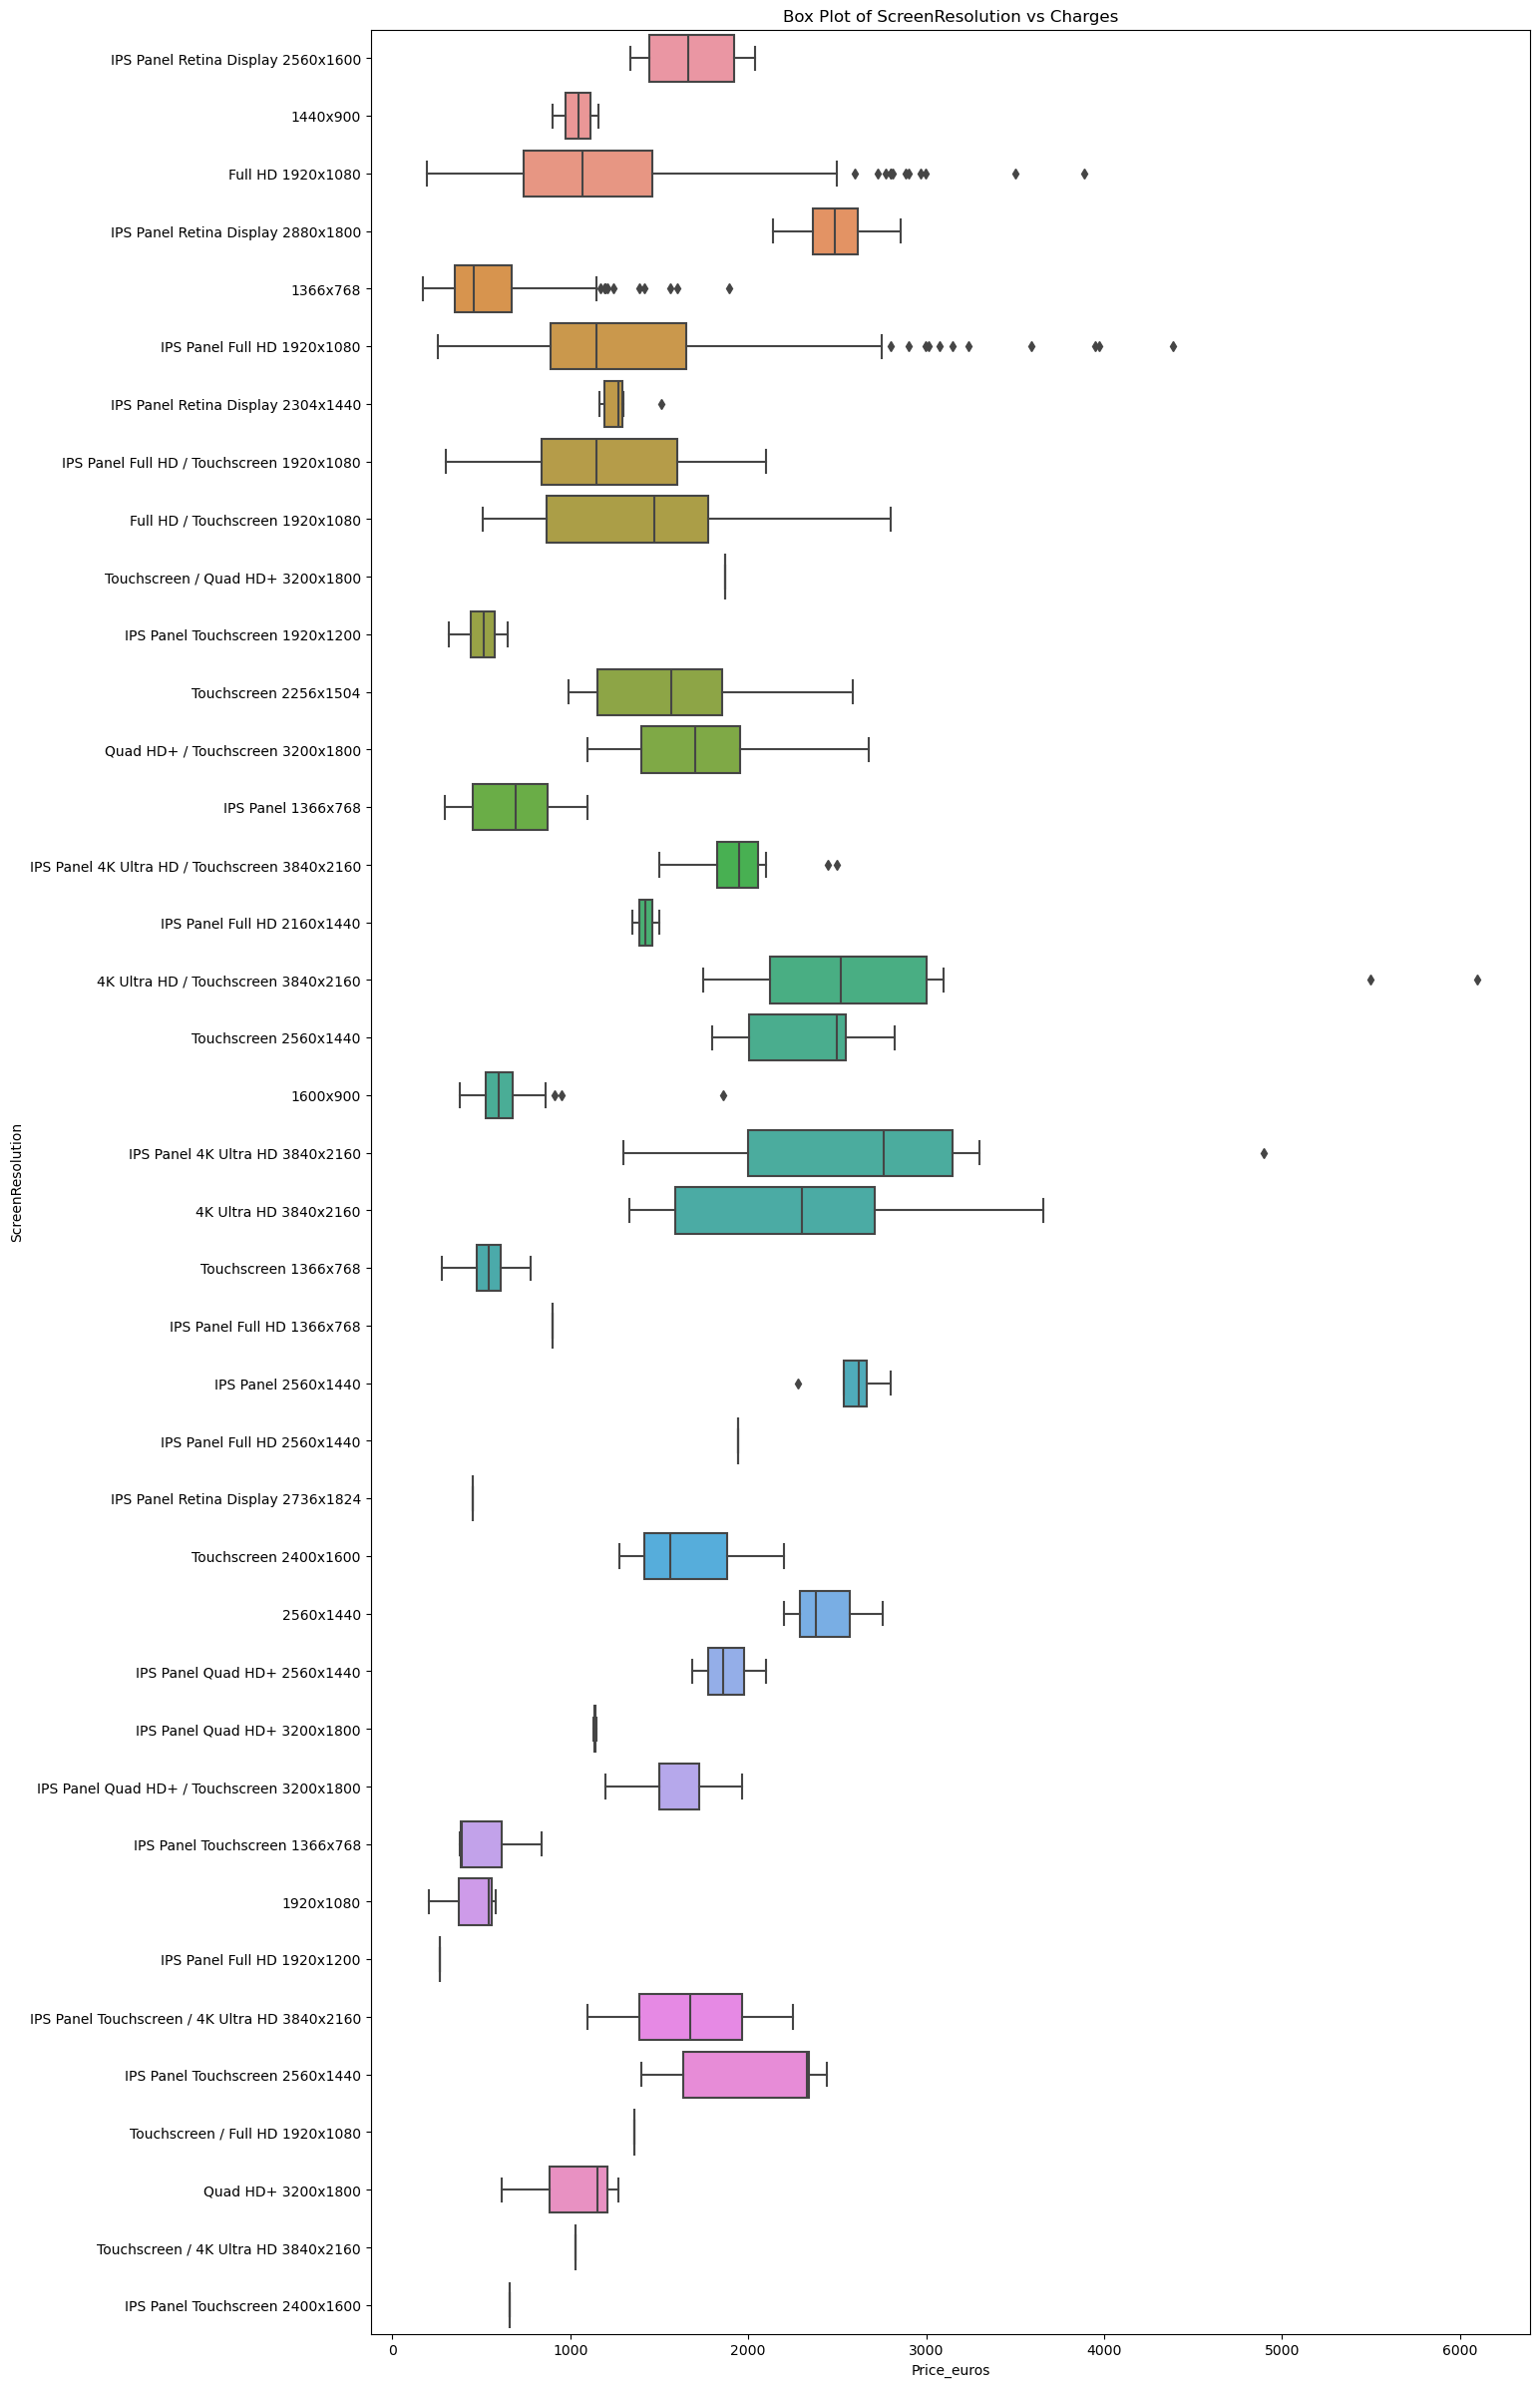

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


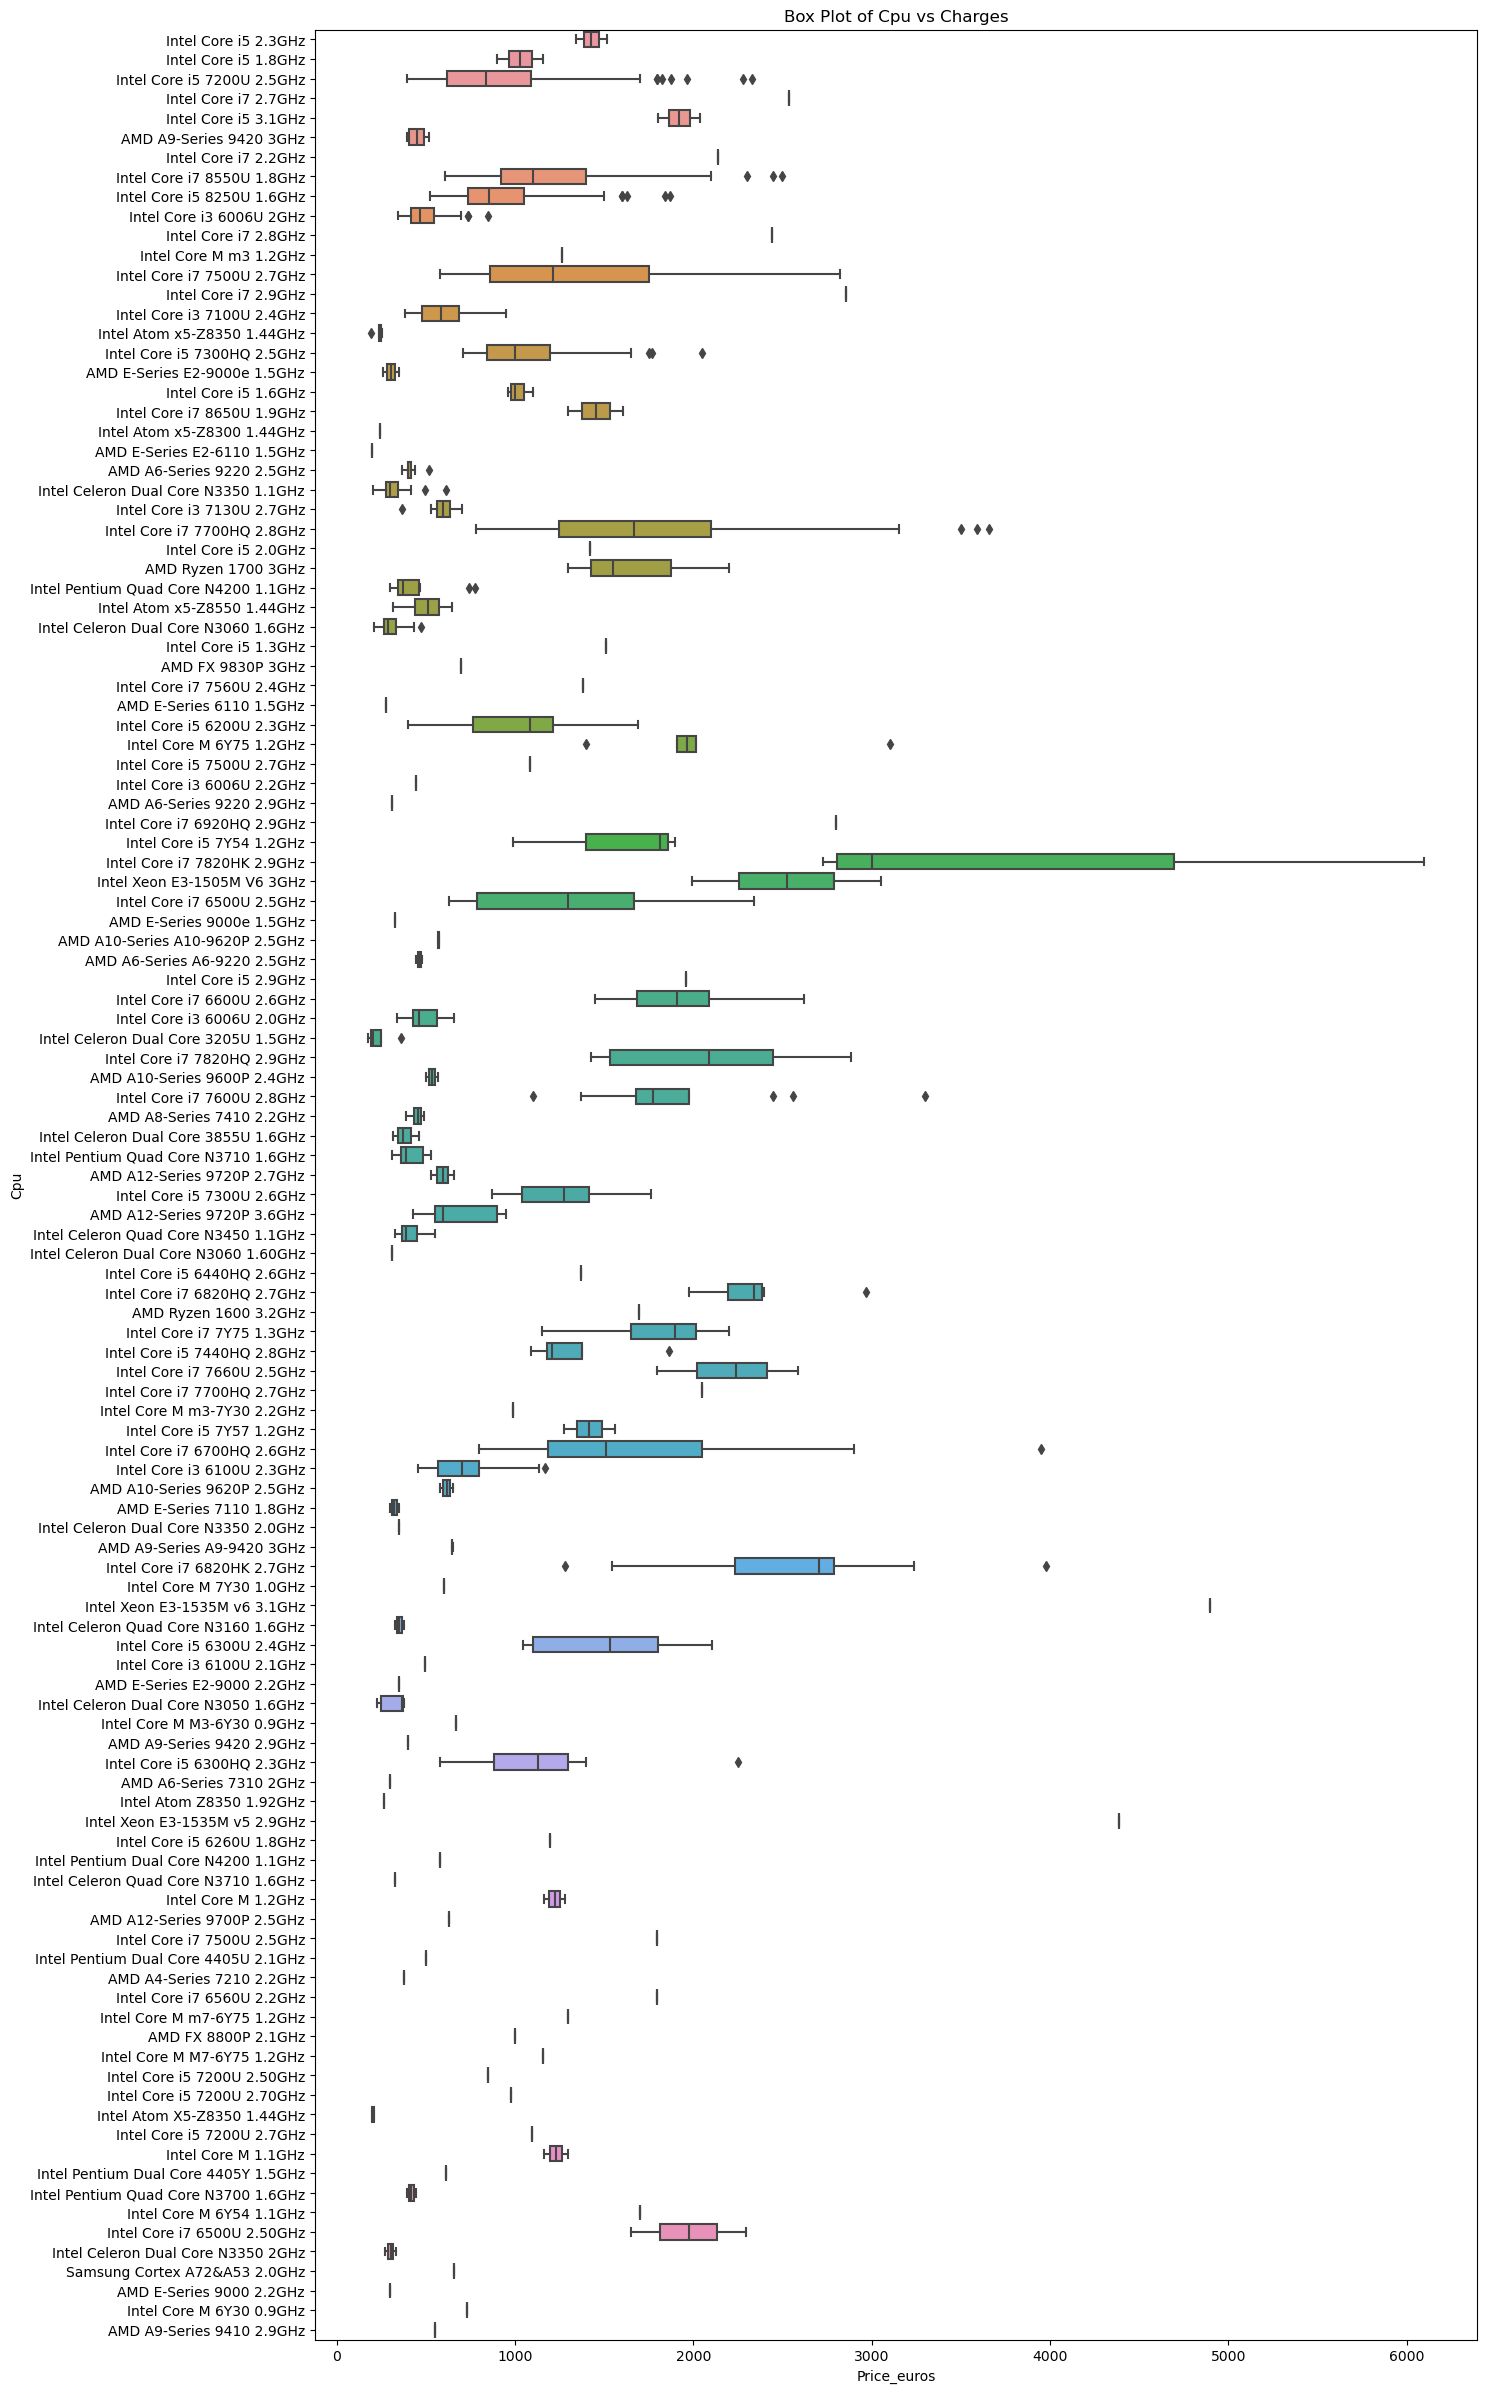

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


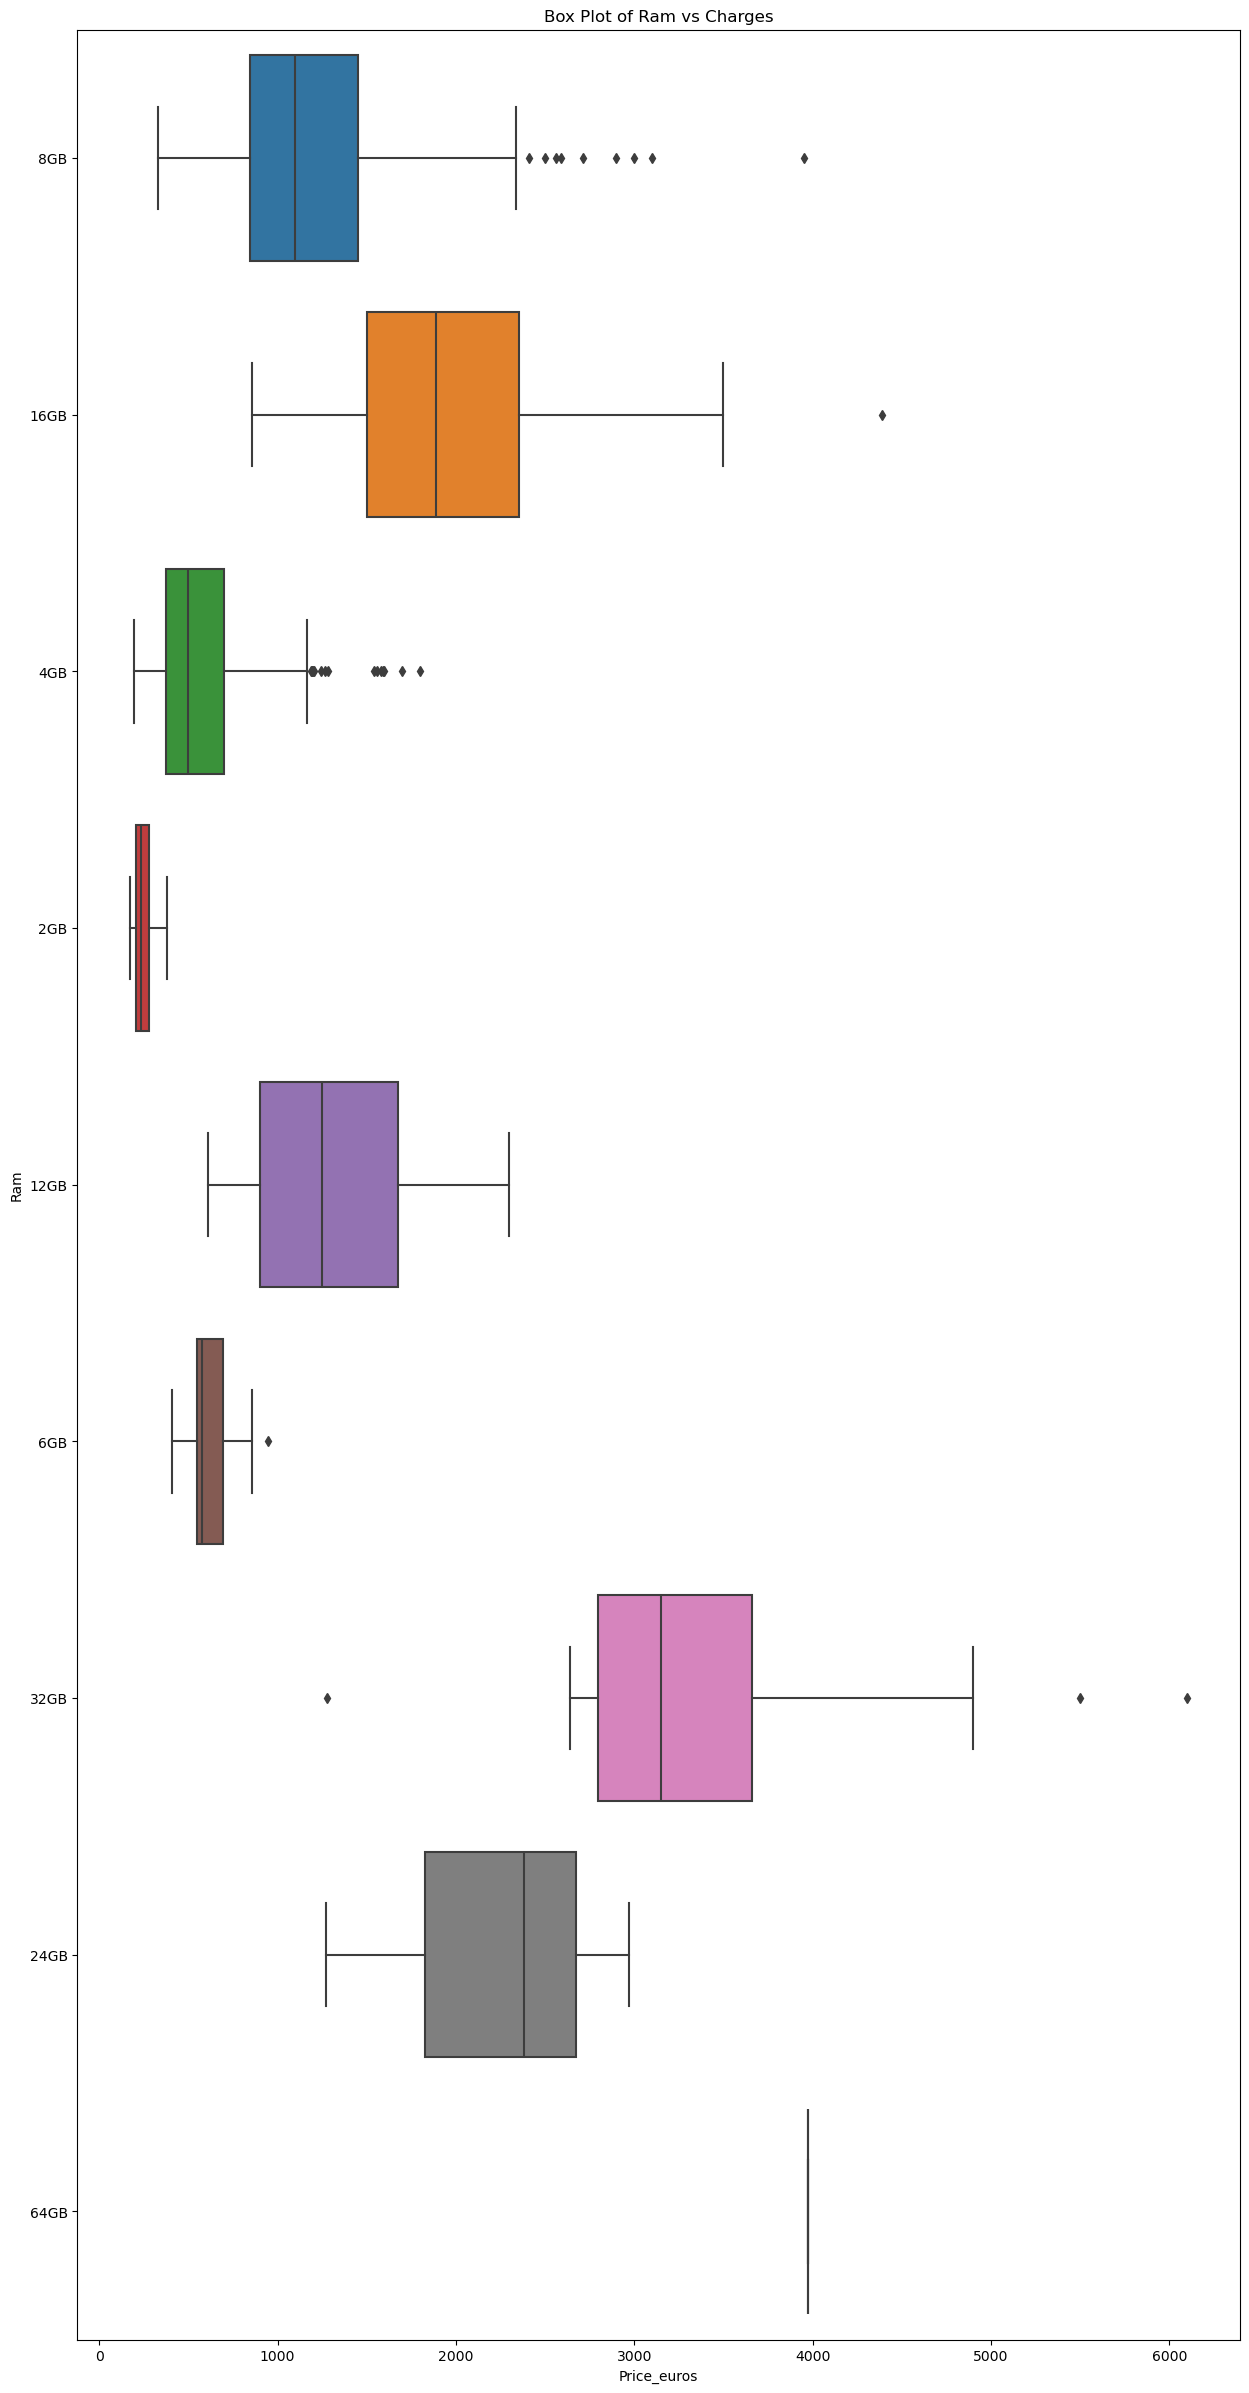

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


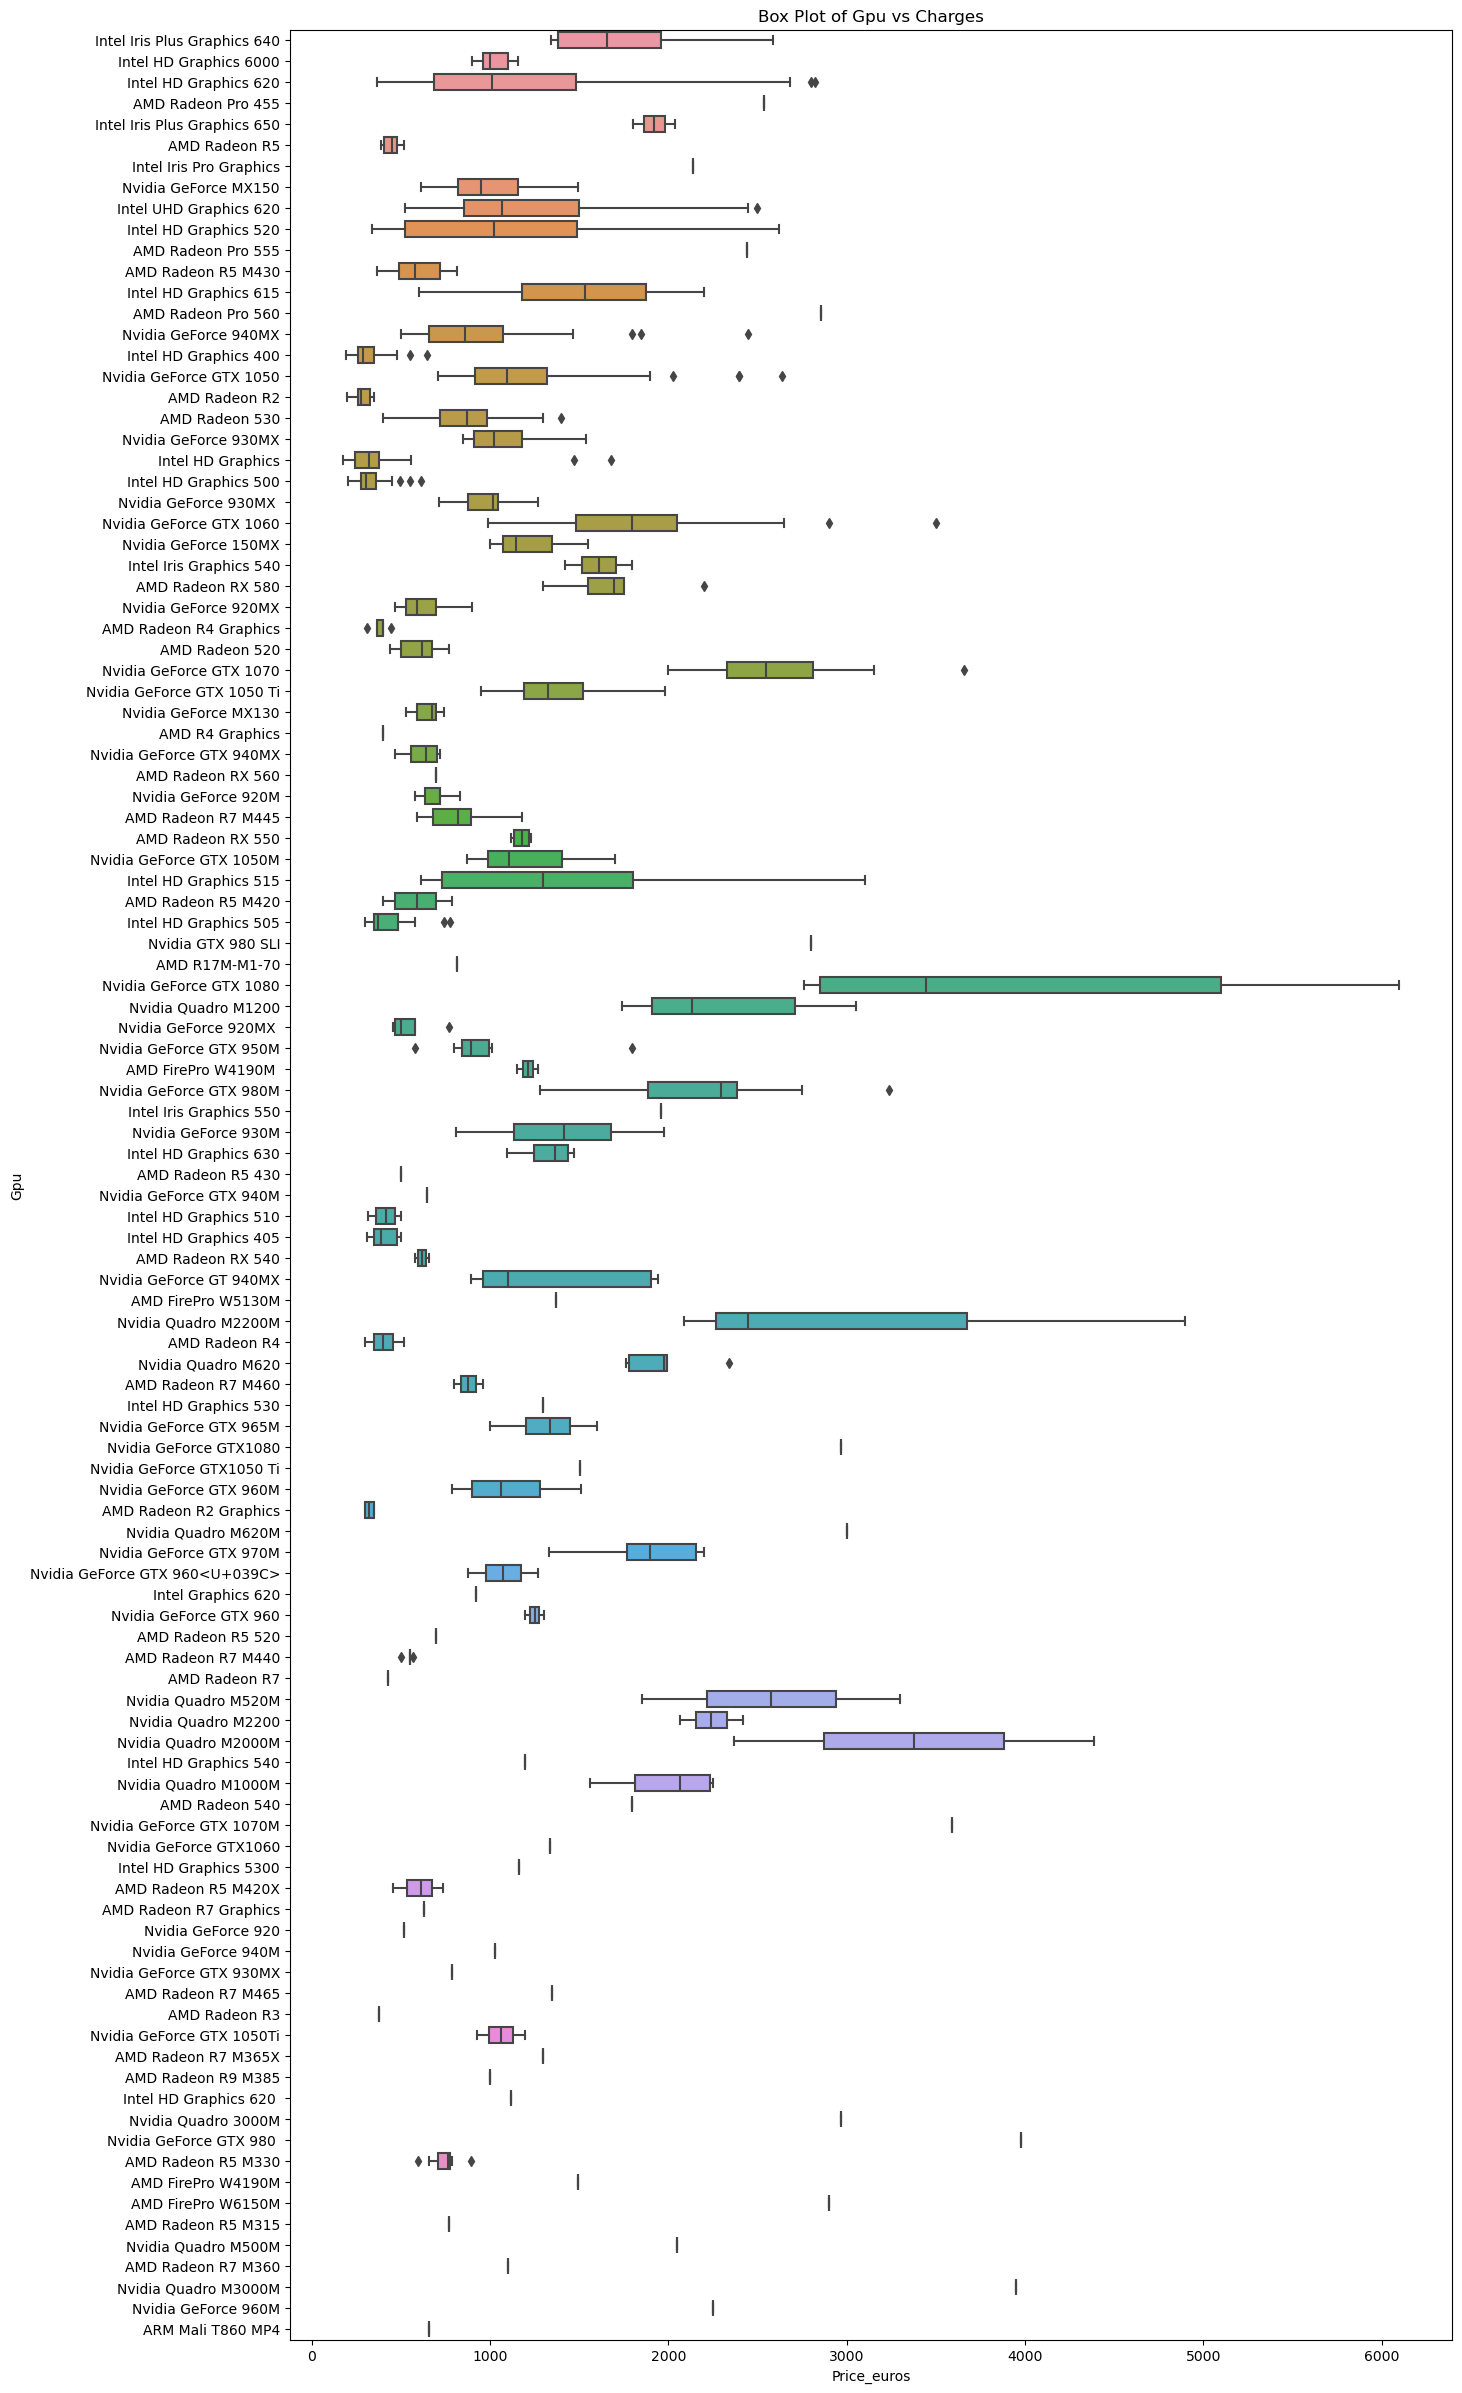

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


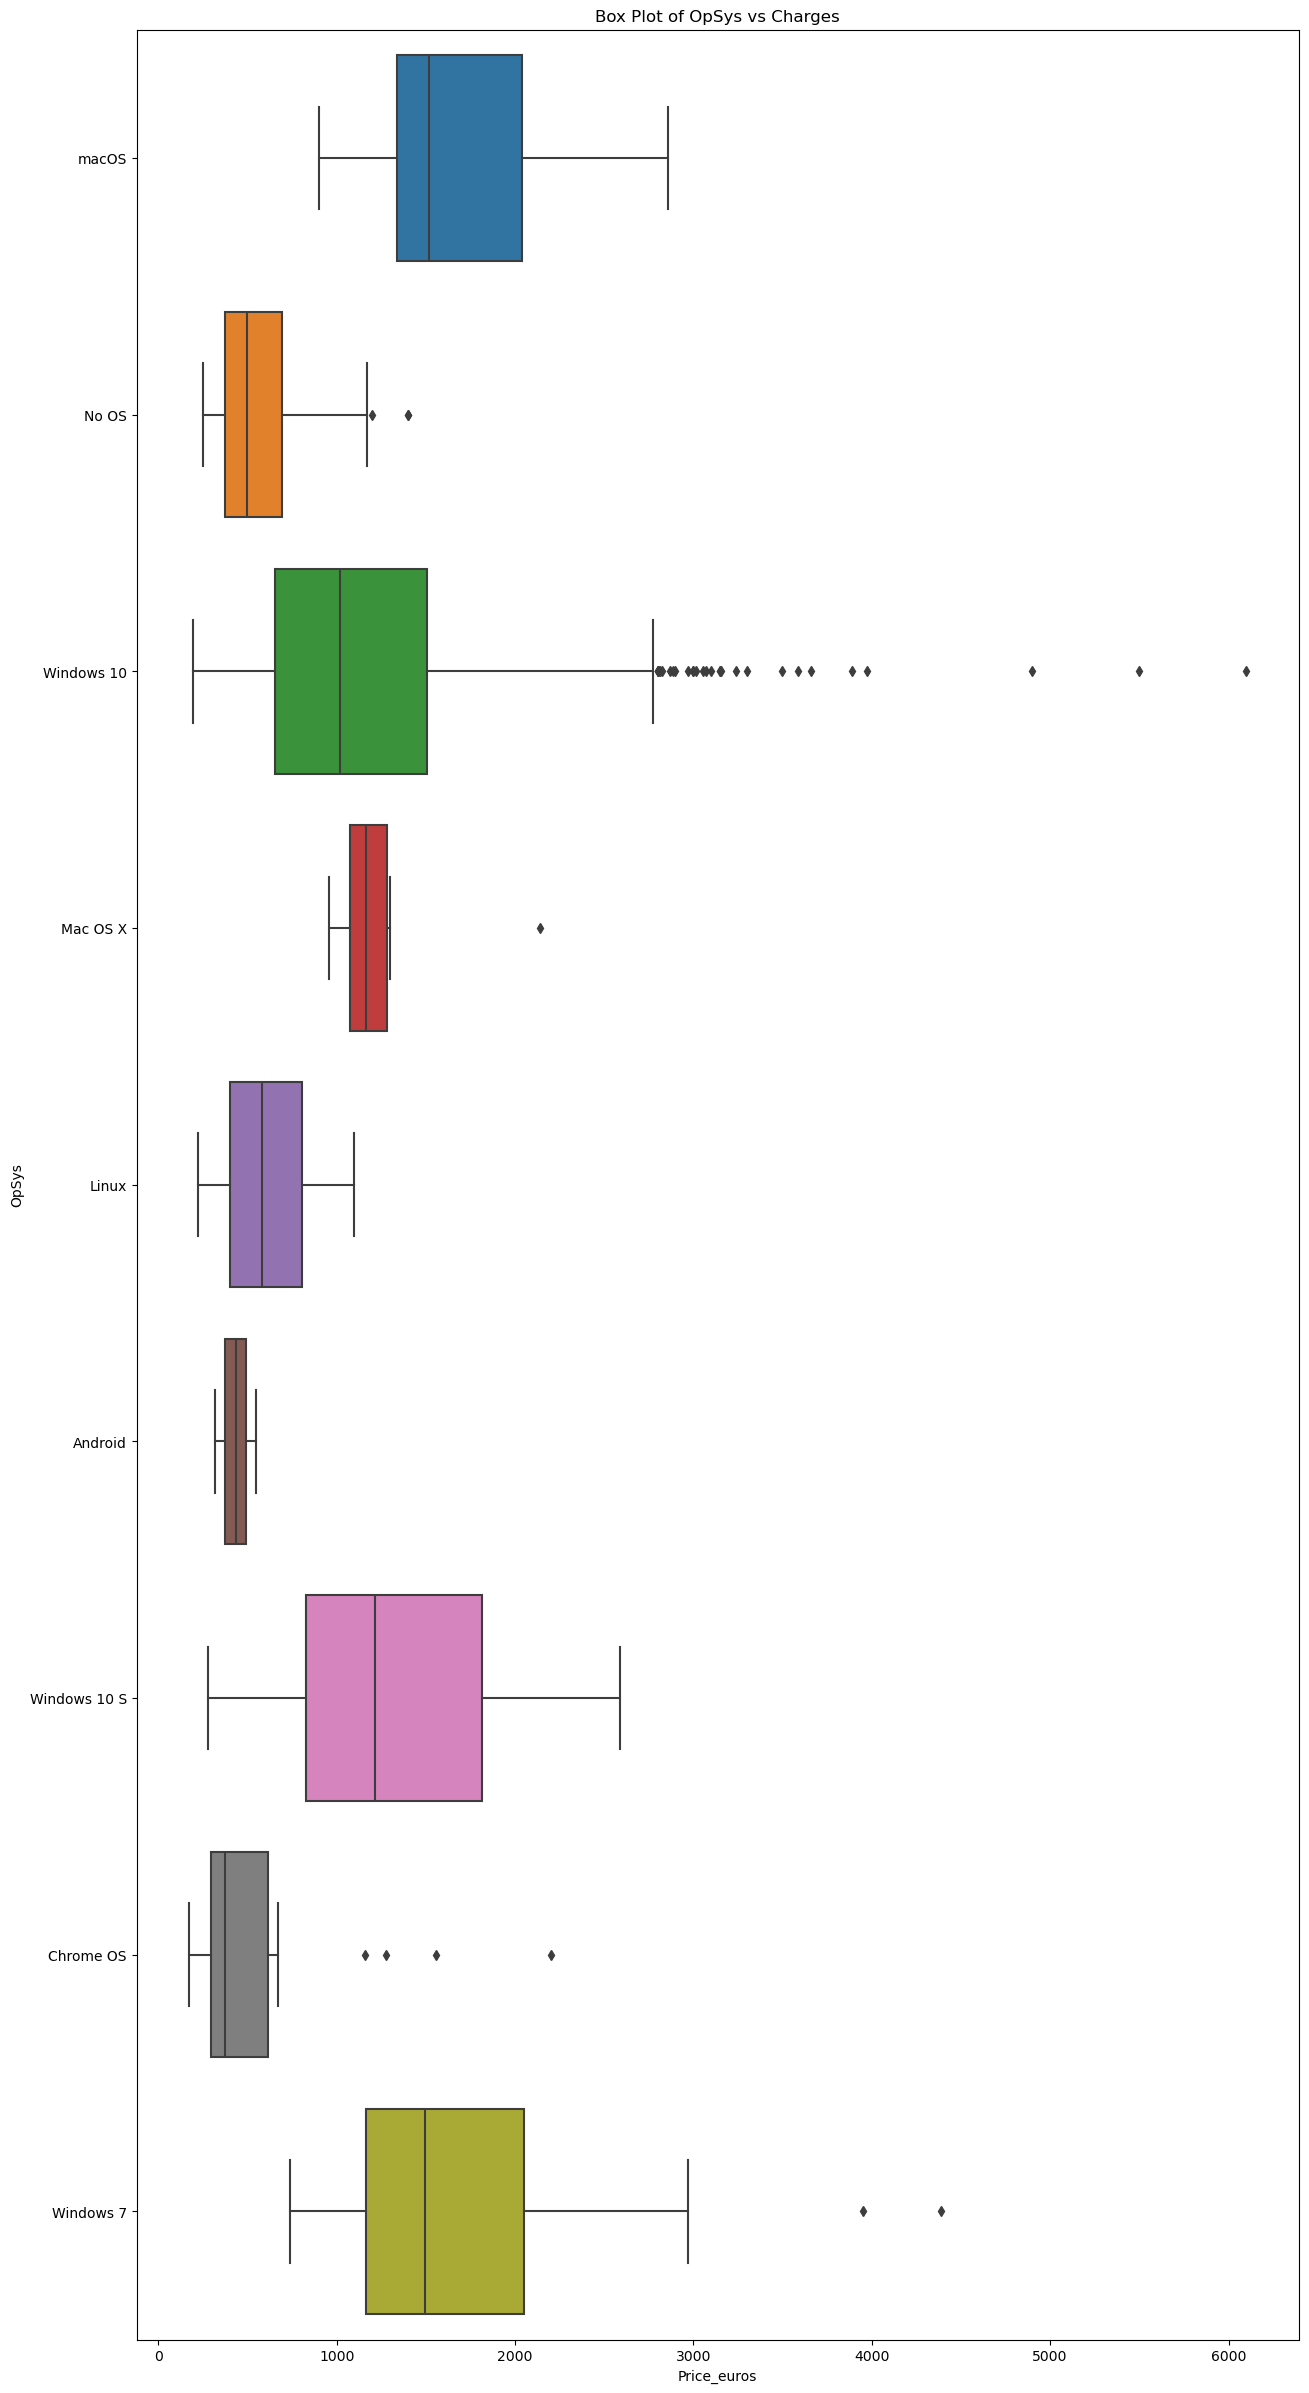

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


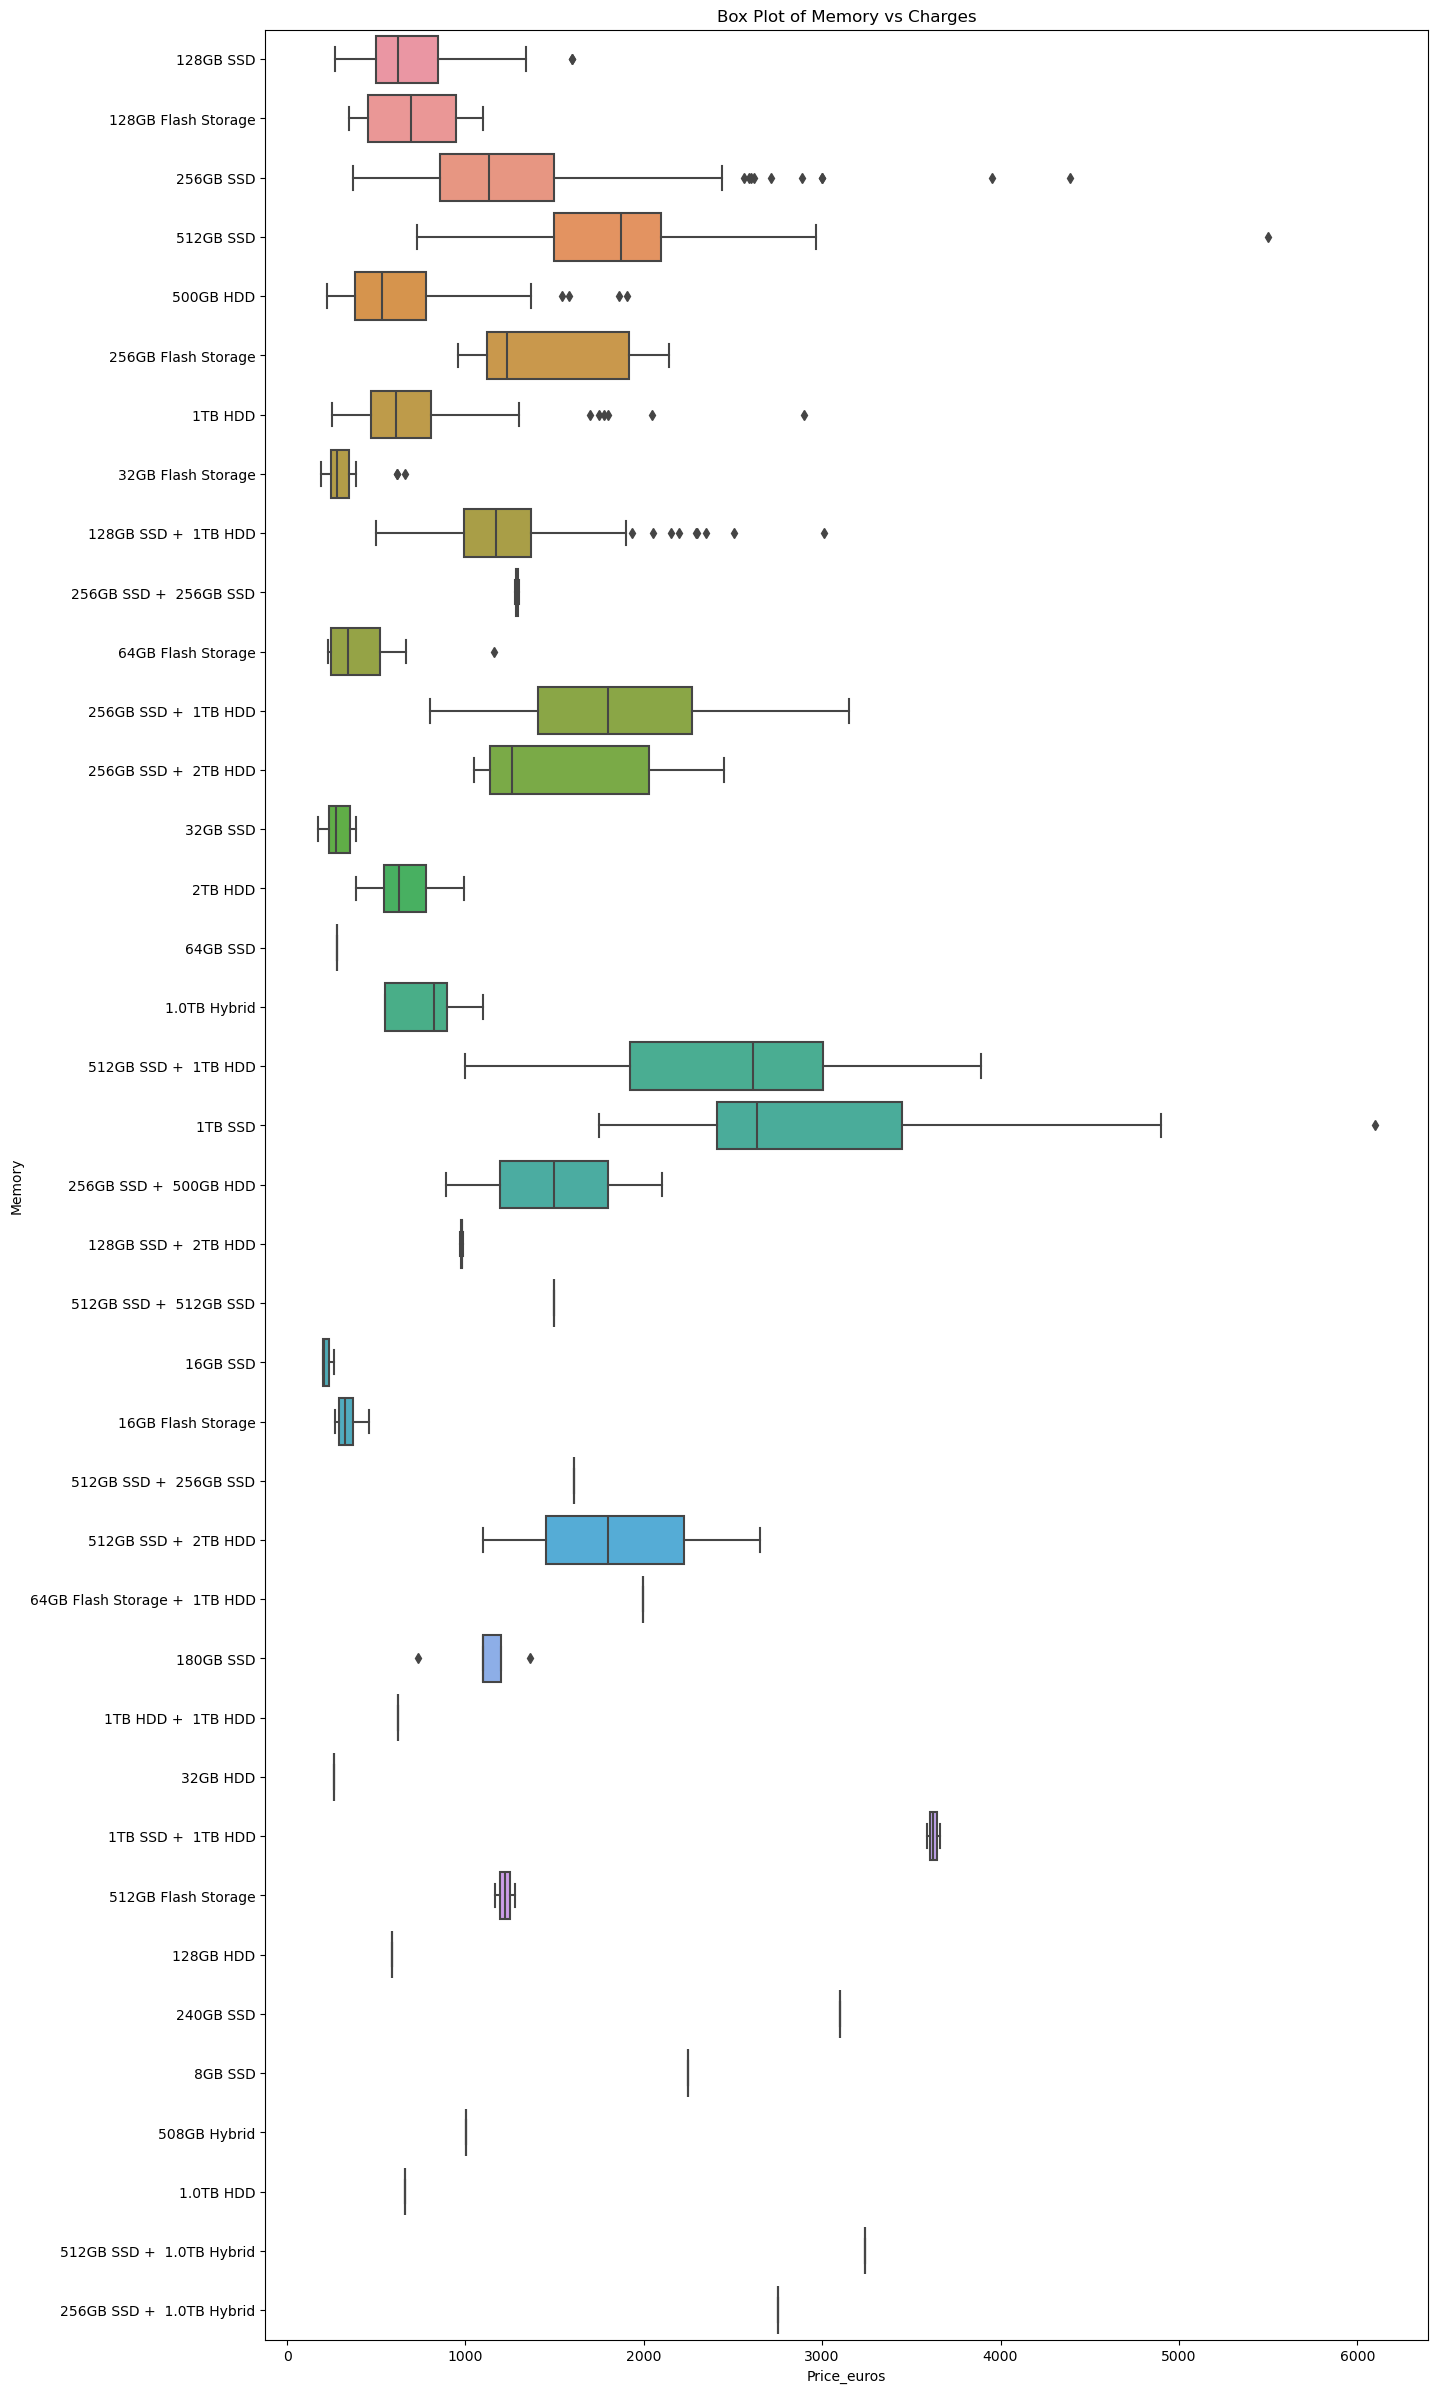

In [11]:
# Box plots for categorical vs numerical variables
for col in categorical_cols:
    plt.figure(figsize=(15,30))
    sns.boxplot(y=col, x='Price_euros', data=df)
    plt.title(f"Box Plot of {col} vs Charges")
    plt.show()

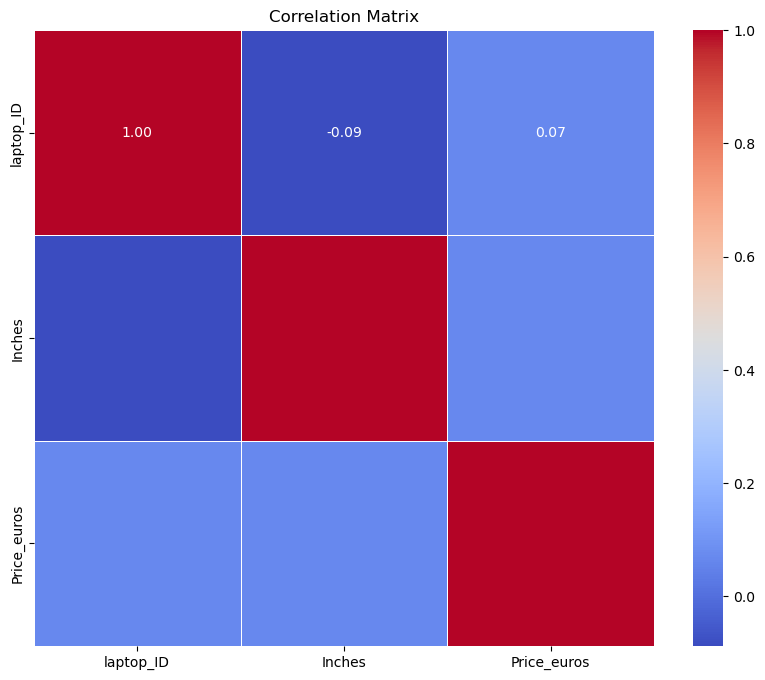

In [12]:
# Exclude non-numeric columns from correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing


In [13]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [14]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [15]:
df.drop(columns = ['laptop_ID', 'ScreenResolution', 'Product'], inplace = True)

In [16]:
# Example: Extract CPU brand from 'Cpu' column
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [17]:
# one hot encoding for categorical values
categorical_cols = ['Company', 'TypeName','Cpu','Gpu', 'OpSys', 'Cpu_Brand', 'Gpu_Brand','Memory']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
# feature scaling 
scaler = MinMaxScaler()
df[['Weight', 'Ram', 'Inches']] = scaler.fit_transform(df[['Weight', 'Ram', 'Inches']])

In [19]:
# split the data for train and test
X = df.drop(columns ='Price_euros')
y = df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("\nSummary of preprocessing:")
print("--------------------------")
print("Missing values after preprocessing:")
print(df.isnull().sum())
print("\nShape of encoded DataFrame:", df.shape)


Summary of preprocessing:
--------------------------
Missing values after preprocessing:
Inches                                  0
Ram                                     0
Weight                                  0
Price_euros                             0
Company_Apple                           0
                                       ..
Memory_512GB SSD +  512GB SSD           0
Memory_64GB Flash Storage               0
Memory_64GB Flash Storage +  1TB HDD    0
Memory_64GB SSD                         0
Memory_8GB SSD                          0
Length: 304, dtype: int64

Shape of encoded DataFrame: (1303, 304)


# ML model

In [21]:
X = df.drop(columns ='Price_euros')
y = df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = rf_regressor.predict(X_test)

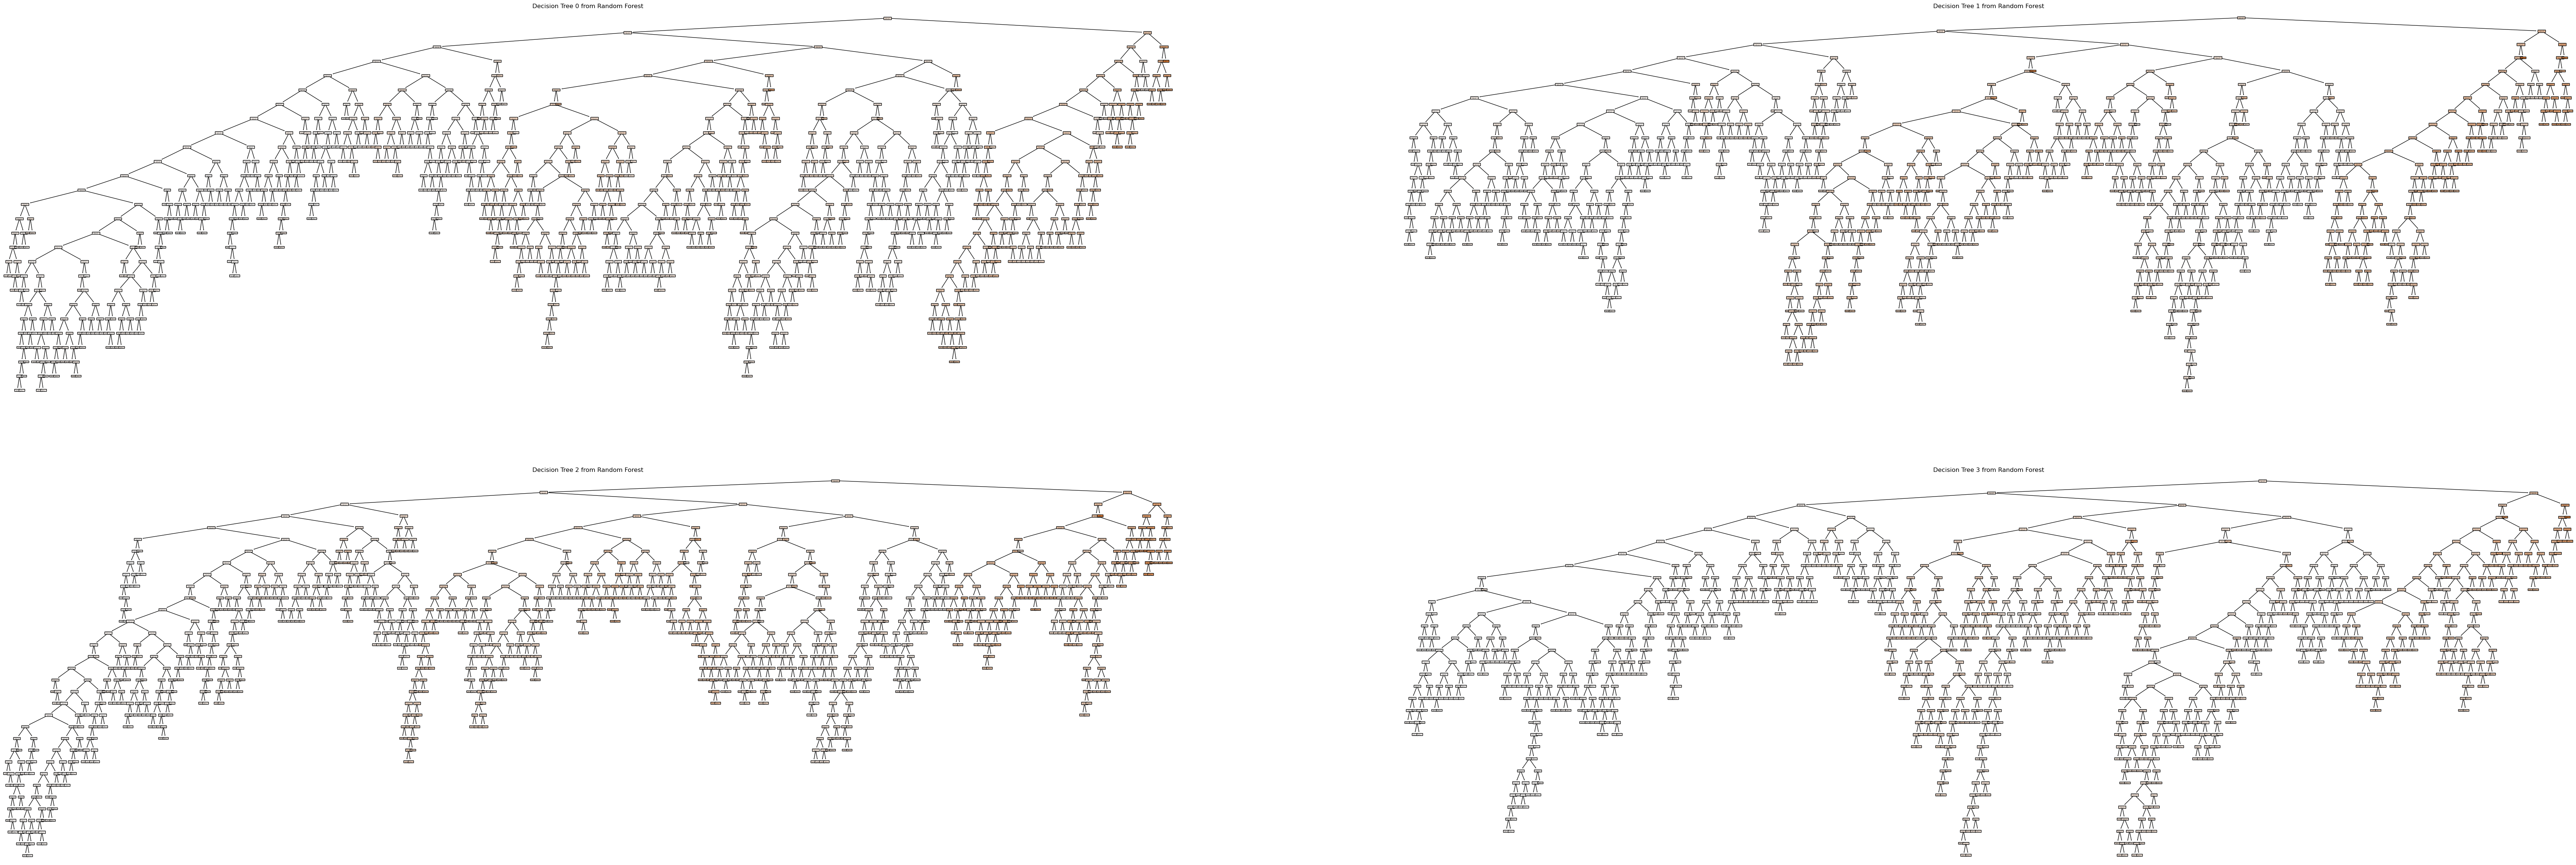

In [25]:
# Visualize the decision trees in the Random Forest
_, axes= plt.subplots(2,2, figsize=(90,30))
for i in range(4):
    plot_tree(rf_regressor.estimators_[i], filled=True, feature_names=[f'Feature {i}' for i in range(X.shape[1])], ax= axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Decision Tree {i} from Random Forest")

In [26]:
for i in range(4):
    dt= rf_regressor.estimators_[i]
    print(f"Decision Tree no. {i}:", " "*5, "|", dt.predict([X_test.iloc[33]])[0])

print('-'*35)
print("Random Forest predection: ", "|", rf_regressor.predict([X_test.iloc[33]])[0])

Decision Tree no. 0:       | 1299.0
Decision Tree no. 1:       | 999.0
Decision Tree no. 2:       | 1669.0
Decision Tree no. 3:       | 779.0
-----------------------------------
Random Forest predection:  | 1153.4749333333336


C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


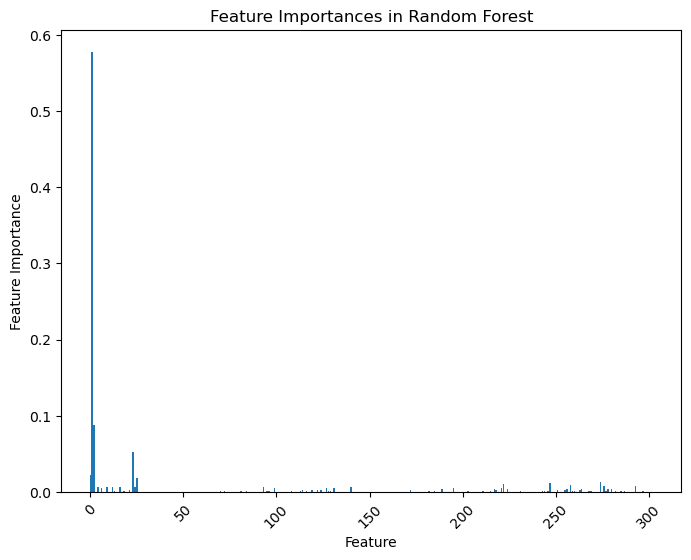

In [40]:
RF_feature_importances = rf_regressor.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), RF_feature_importances)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances in Random Forest")
plt.xticks(rotation=45)
plt.show()

In [39]:
RF_feature_importances

array([2.21801796e-02, 5.77355683e-01, 8.79597232e-02, 3.49825086e-04,
       6.46567729e-03, 3.61953583e-06, 4.74946890e-03, 1.22589654e-05,
       4.81536120e-05, 6.40973980e-03, 4.77490284e-05, 1.08107876e-04,
       6.24607944e-03, 9.67717705e-04, 1.17424761e-06, 5.23236178e-05,
       6.95779653e-03, 2.01475901e-04, 1.41728187e-03, 3.01010958e-05,
       6.10233185e-06, 2.32541046e-03, 3.57274490e-04, 5.24318880e-02,
       6.59153704e-03, 1.79972357e-02, 5.94431902e-06, 1.68459967e-05,
       0.00000000e+00, 3.06905258e-05, 2.67224598e-05, 1.32223697e-06,
       2.77783676e-06, 3.70045434e-05, 4.37591142e-07, 2.31957714e-05,
       9.73051566e-05, 4.63551173e-07, 0.00000000e+00, 5.14868548e-05,
       1.68459778e-05, 7.65585268e-06, 1.13261476e-05, 6.15999863e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.71601178e-07,
       3.82169980e-04, 7.92788688e-07, 9.02704665e-05, 8.38122191e-05,
       2.52110090e-06, 0.00000000e+00, 3.63696989e-07, 4.21430455e-06,
      

[2.02152451e-02 6.01204224e-01 7.78139717e-02 0.00000000e+00
 7.29830018e-03 0.00000000e+00 2.54118593e-03 0.00000000e+00
 1.64241722e-04 1.97615095e-03 0.00000000e+00 0.00000000e+00
 4.95058899e-03 6.97004325e-04 3.72222411e-07 0.00000000e+00
 0.00000000e+00 2.19788205e-05 8.14084655e-04 5.51964589e-06
 0.00000000e+00 1.65360424e-04 9.28810236e-04 5.27668918e-02
 6.14677941e-03 1.39156839e-02 0.00000000e+00 7.13364426e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.58305701e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.50522435e-04
 1.29299974e-05 0.00000000e+00 2.44454345e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.24067934e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.64016563e-06 0.00000000e+00
 0.00000000e+00 5.18356085e-04 9.48287817e-05 0.00000000e+00
 0.00000000e+00 0.000000

[1.04154362e-02 5.78881337e-01 1.25213938e-01 0.00000000e+00
 2.44893989e-03 0.00000000e+00 7.01923180e-04 1.04048261e-06
 0.00000000e+00 1.93732452e-02 0.00000000e+00 0.00000000e+00
 1.86202674e-02 1.50025372e-03 7.70727856e-07 0.00000000e+00
 3.59354713e-06 2.69365451e-04 1.20542619e-03 0.00000000e+00
 0.00000000e+00 1.57217337e-03 4.01890468e-05 5.24940159e-02
 1.16340231e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.91926628e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.40715745e-05
 7.72794341e-05 0.00000000e+00 0.00000000e+00 6.92970136e-05
 1.77785340e-05 0.00000000e+00 1.45795646e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.61524021e-05 9.27254085e-06 0.00000000e+00
 9.55582115e-09 1.970144

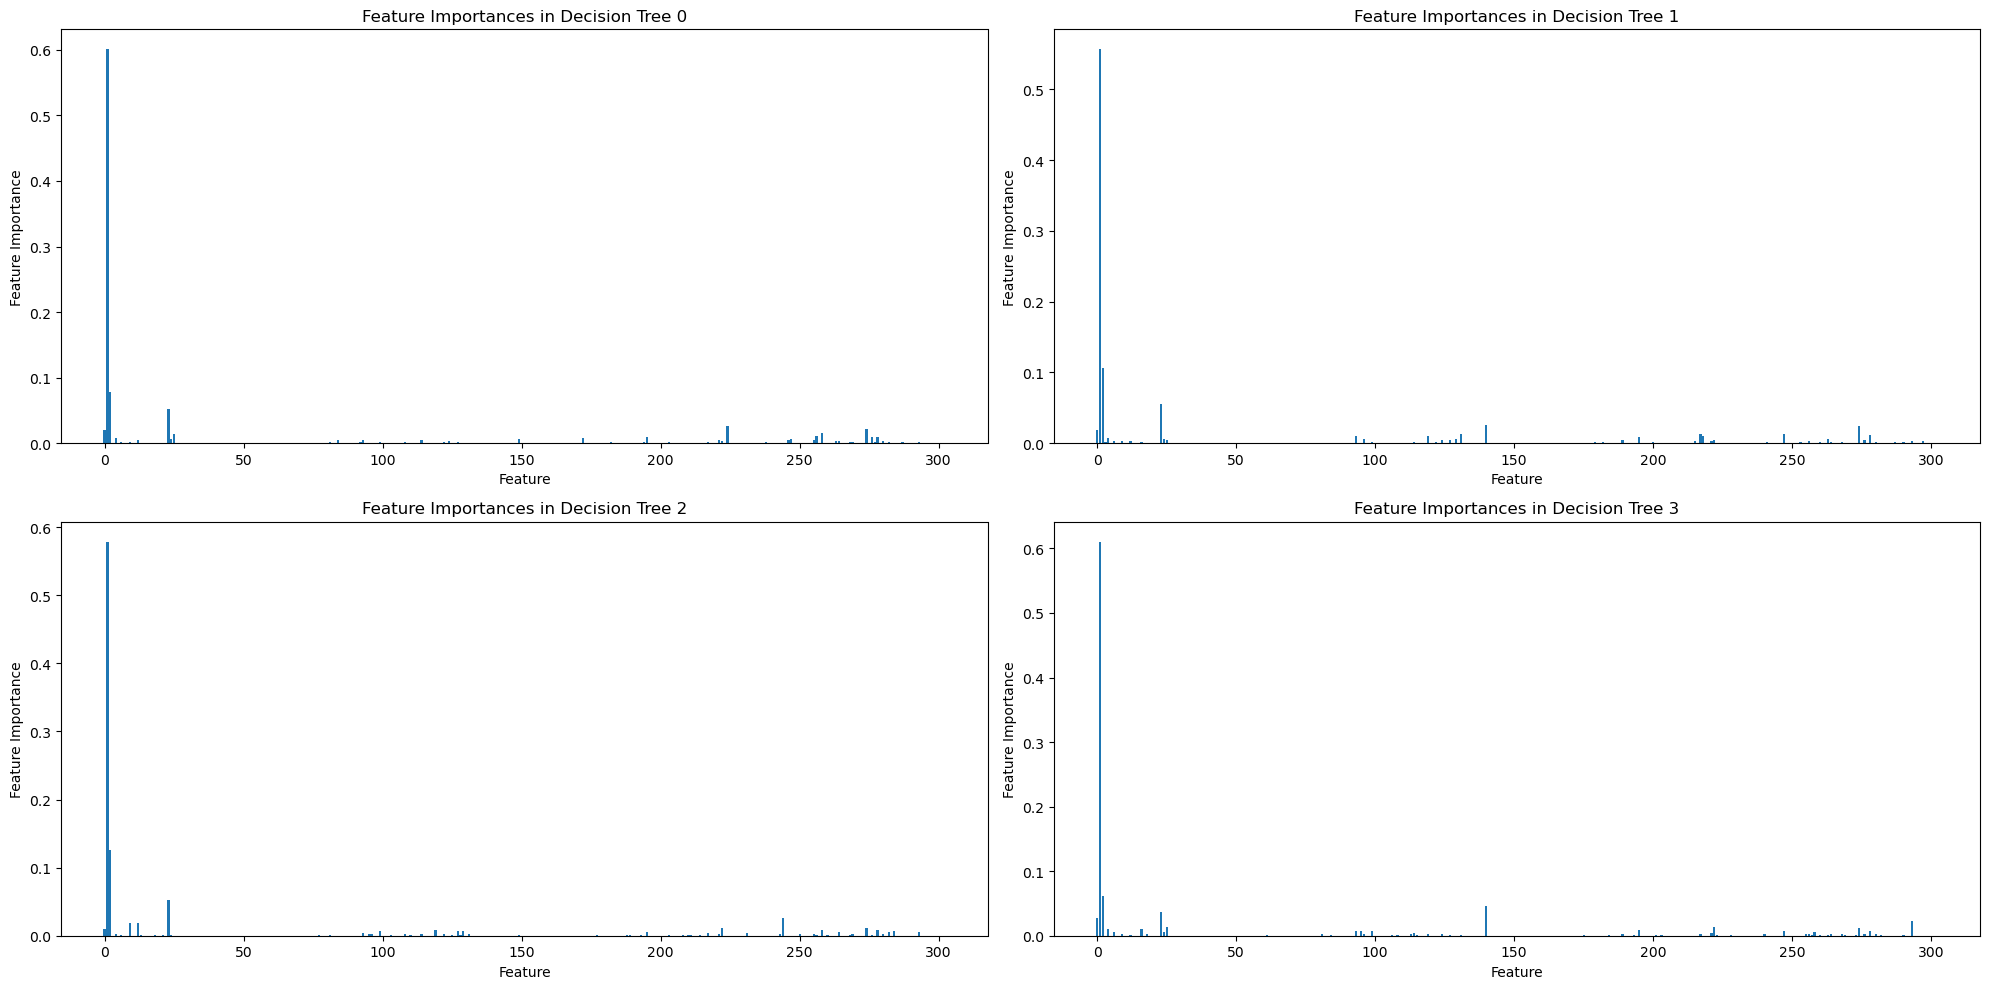

In [41]:
_, axes= plt.subplots(2,2, figsize=(20,10))
for i in range(4):
    feature_importances = rf_regressor.estimators_[i].feature_importances_
    axes[i//2, i%2].bar(range(X.shape[1]), feature_importances)
    print(feature_importances)
    axes[i//2, i%2].set_xlabel("Feature")
    axes[i//2, i%2].set_ylabel("Feature Importance")
    axes[i//2, i%2].set_title(f"Feature Importances in Decision Tree {i}")
plt.tight_layout()


In [43]:
import numpy as np
all_importances= np.array(np.array([RF_feature_importances]))
all_importances.mean(axis= 0)

array([2.21801796e-02, 5.77355683e-01, 8.79597232e-02, 3.49825086e-04,
       6.46567729e-03, 3.61953583e-06, 4.74946890e-03, 1.22589654e-05,
       4.81536120e-05, 6.40973980e-03, 4.77490284e-05, 1.08107876e-04,
       6.24607944e-03, 9.67717705e-04, 1.17424761e-06, 5.23236178e-05,
       6.95779653e-03, 2.01475901e-04, 1.41728187e-03, 3.01010958e-05,
       6.10233185e-06, 2.32541046e-03, 3.57274490e-04, 5.24318880e-02,
       6.59153704e-03, 1.79972357e-02, 5.94431902e-06, 1.68459967e-05,
       0.00000000e+00, 3.06905258e-05, 2.67224598e-05, 1.32223697e-06,
       2.77783676e-06, 3.70045434e-05, 4.37591142e-07, 2.31957714e-05,
       9.73051566e-05, 4.63551173e-07, 0.00000000e+00, 5.14868548e-05,
       1.68459778e-05, 7.65585268e-06, 1.13261476e-05, 6.15999863e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.71601178e-07,
       3.82169980e-04, 7.92788688e-07, 9.02704665e-05, 8.38122191e-05,
       2.52110090e-06, 0.00000000e+00, 3.63696989e-07, 4.21430455e-06,
      

In [44]:
y_pred = rf_regressor.predict(X_test)

# Evaluating using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
print("Random Forest Regressor Model Evaluation:")
print("------------------------------------------\n")
print(f"{'Mean Absolute Error:': <30}", mae)
print("------------------------------------------\n")
print(f"{'Mean Squared Error:': <30} ", mse)
print("------------------------------------------\n")
print(f"{'Root Mean Squared Error: ': <30} ", rmse)
print("------------------------------------------\n")
print(f"{'r2 score: ': <30}", r2)

Random Forest Regressor Model Evaluation:
------------------------------------------

Mean Absolute Error:           196.1999317866265
------------------------------------------

Mean Squared Error:             107778.39062140665
------------------------------------------

Root Mean Squared Error:        328.29619343118594
------------------------------------------

r2 score:                      0.787807122947963


In [45]:
k = 5
scores = cross_val_score(rf_regressor, X, y, cv=k, scoring='r2')

In [46]:
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: R-squared Score: {score :.2f}")

Fold 1: R-squared Score: 0.83
Fold 2: R-squared Score: 0.79
Fold 3: R-squared Score: 0.81
Fold 4: R-squared Score: 0.75
Fold 5: R-squared Score: 0.76


In [47]:
mean_score = scores.mean()
std_score = scores.std()

In [48]:

print(f"\nMean R-squared Score: {mean_score:.2f}")
print("------------------------------------------")
print(f"Standard Deviation of R-squared Scores: {std_score:.2f}")


Mean R-squared Score: 0.79
------------------------------------------
Standard Deviation of R-squared Scores: 0.03


In [49]:
param_grid = {
    'n_estimators': [10, 50, 100], 
    #'max_features': ['square', 'log'], 
    'max_features': [int(np.sqrt(X.shape[1])), int(np.log(X.shape[1]))],
     'min_samples_split':[5,3,7]
}

In [50]:
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2')

In [51]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Random Forest Regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)

# Fit the model with the best hyperparameters to the training data
best_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_features=17, min_samples_split=3, random_state=42)

In [52]:
# Make predictions on the testing data
y_pred = best_rf_regressor.predict(X_test)

In [57]:
predictions = best_rf_regressor.predict(X_test)
r2 = best_rf_regressor.score(X_test, y_test)
print(f"Best R-squared Score on Test Set: {r2 :.2f}")
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params }")

Best R-squared Score on Test Set: 0.81
Best Hyperparameters: {'max_features': 17, 'min_samples_split': 3, 'n_estimators': 100}


In [55]:
# Evaluating using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
print("BEST Random Forest Regressor Model Evaluation:")
print("------------------------------------------\n")
print(f"Mean Absolute Error: {mae:.2f}")
print("------------------------------------------\n")
print(f"Mean Squared Error: {mse:.2f}")
print("------------------------------------------\n")
print(f"Root Mean Squared Error: {rmse:.2f}")
print("------------------------------------------\n")
print(f"r2 score: {r2:.2f}")

BEST Random Forest Regressor Model Evaluation:
------------------------------------------

Mean Absolute Error: 173.18
------------------------------------------

Mean Squared Error: 98338.22
------------------------------------------

Root Mean Squared Error: 313.59
------------------------------------------

r2 score: 0.81


Best hyperparameters: {'max_features': 17, 'min_samples_split': 3, 'n_estimators': 100}
